In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [ ]:
df_train = pd.read_csv('housing_train.csv')
df_test = pd.read_csv('housing_test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#make the list of features which has missing values
feature_na = [features for features in df_train.columns if df_train[features].isnull().sum()>1]
# list out the feature with the % of missing values
for feature in feature_na:
  print(feature, np.round(df_train[feature].isnull().mean(),4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


## Since there are many missing values , we need to find the relationship between missing valuews and Sales Price

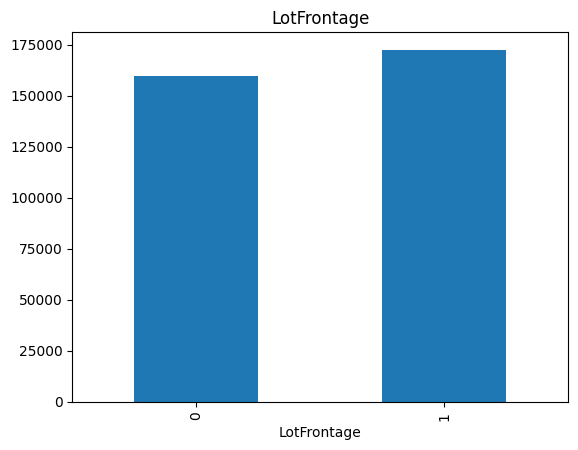

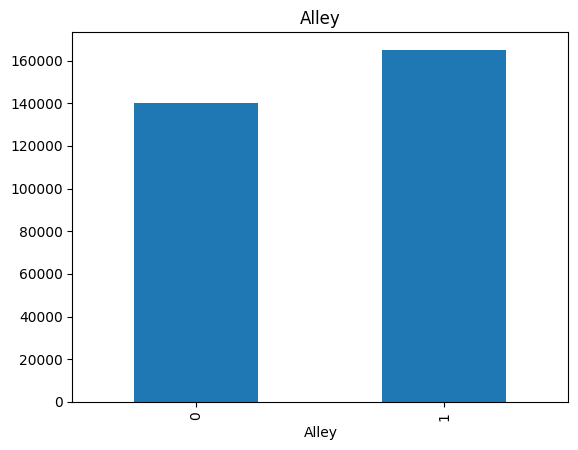

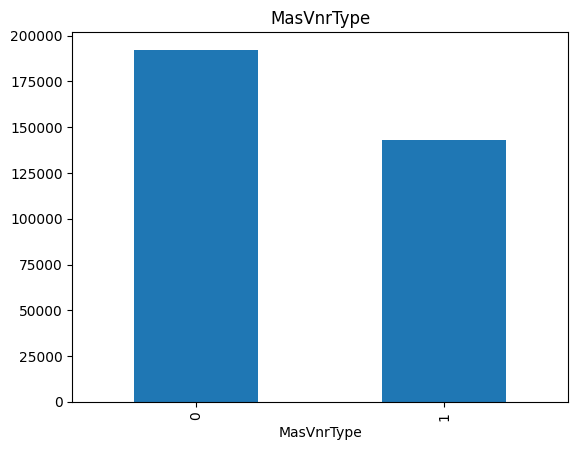

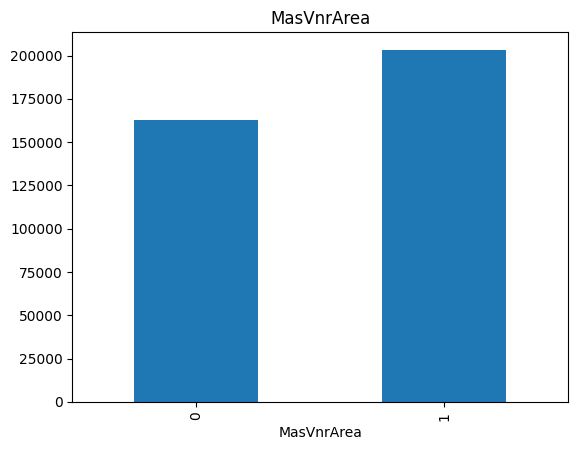

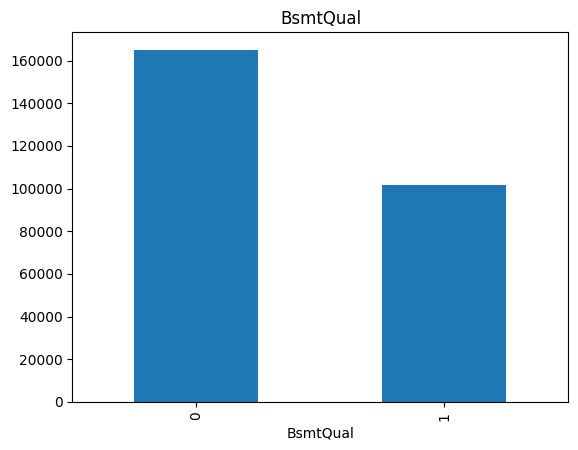

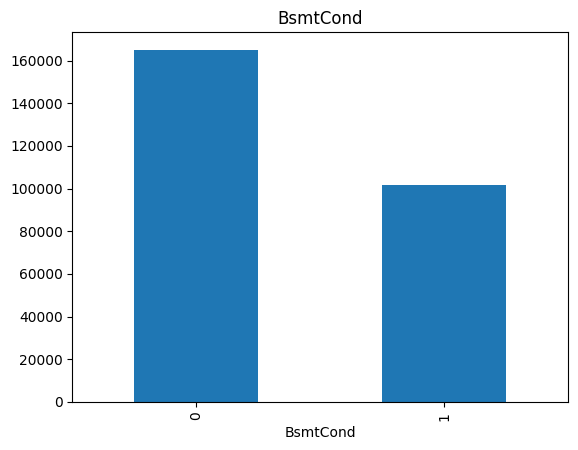

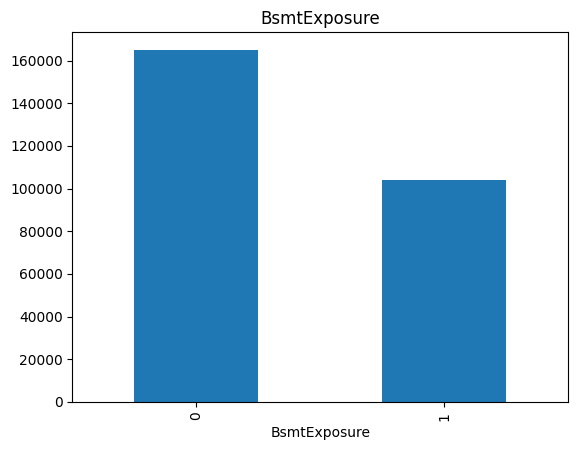

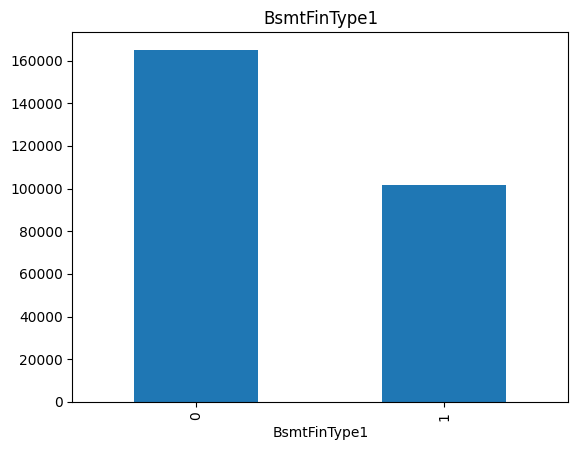

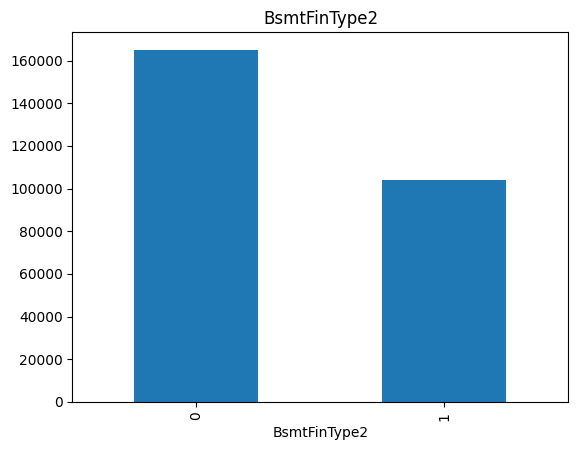

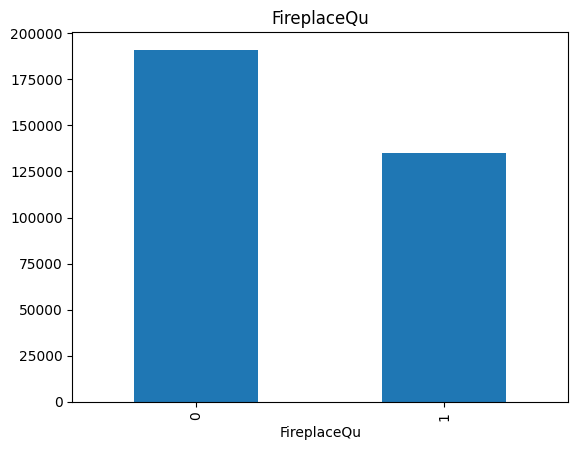

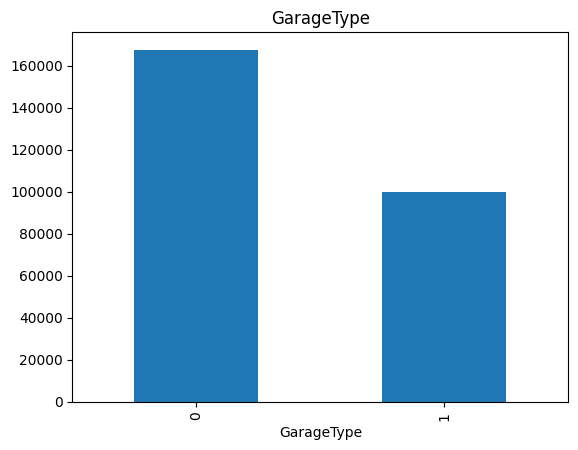

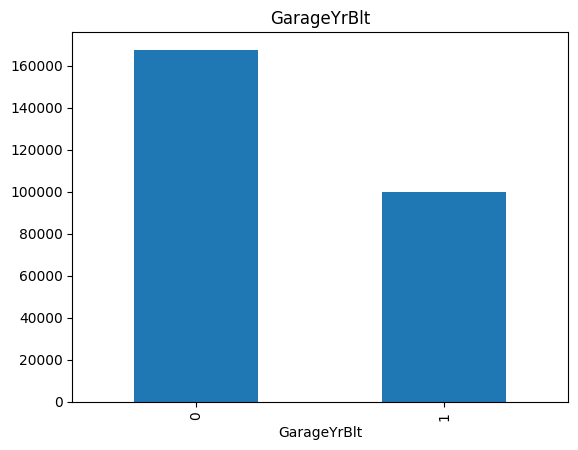

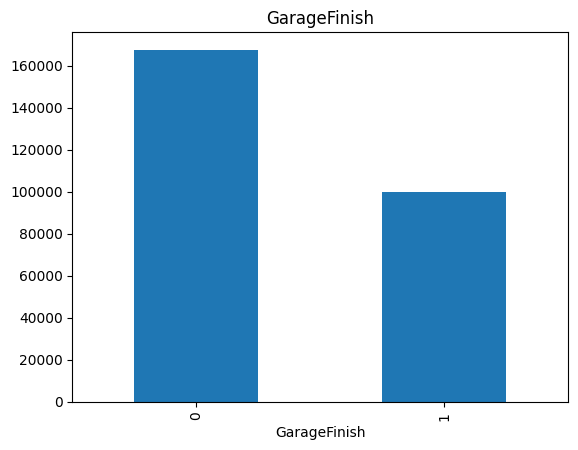

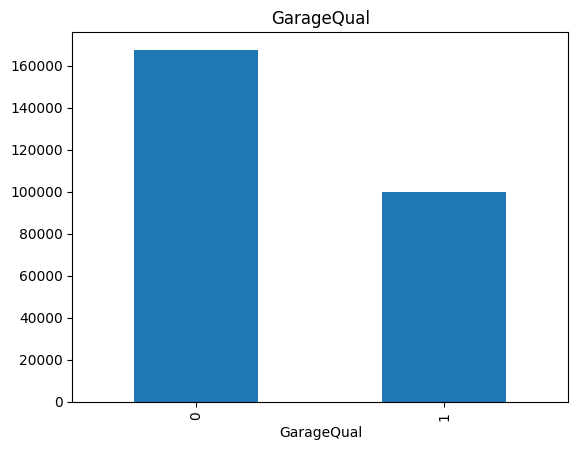

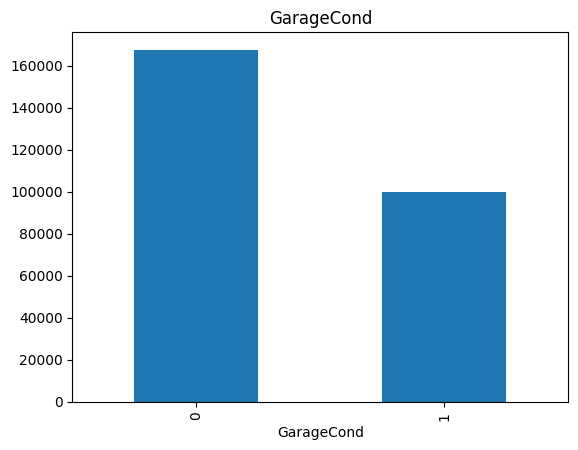

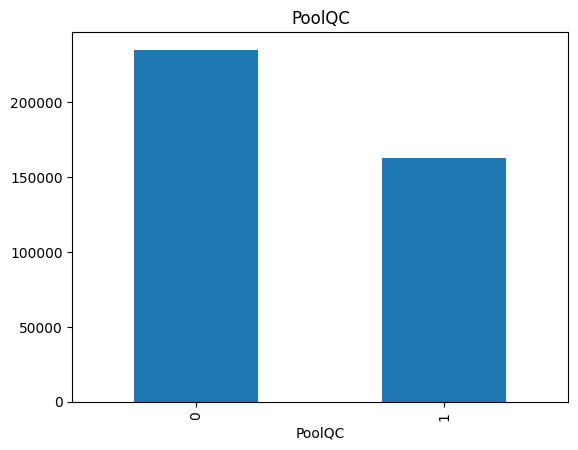

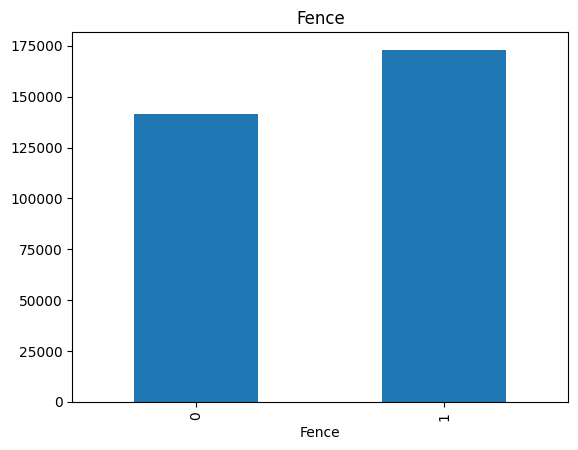

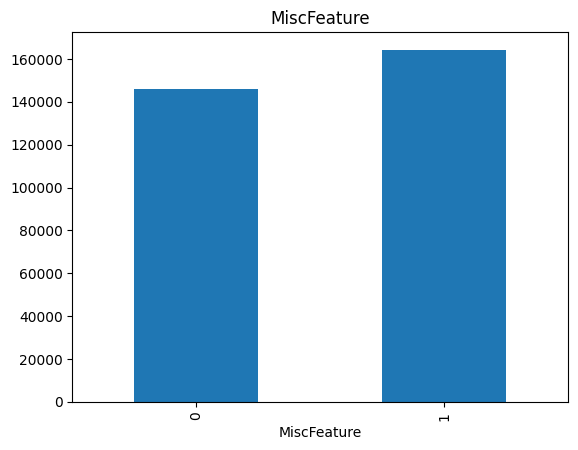

In [ ]:
for feature in feature_na:
  data = df_train.copy()
  data[feature] = np.where(data[feature].isnull(), 1, 0)
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

So , here with the relation between the missing values and the dependent variable is clearly visible. So we need to replace these nan values with something meaningful which we will do in feature engineering section

In [ ]:
numerical_feature = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
len(numerical_feature)

38

In [ ]:
year_feature = [feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
for feature in year_feature:
  print(feature, df_train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

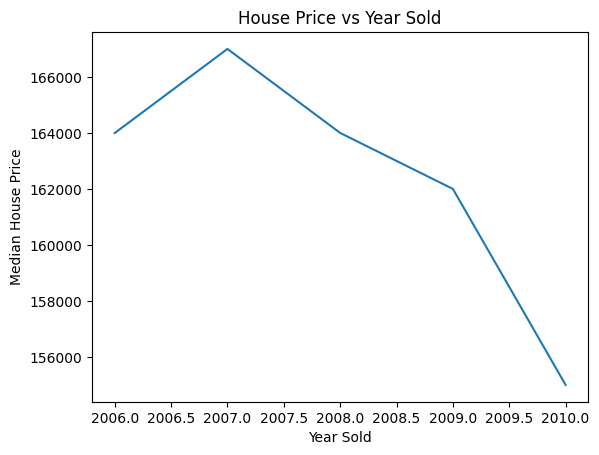

In [ ]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')

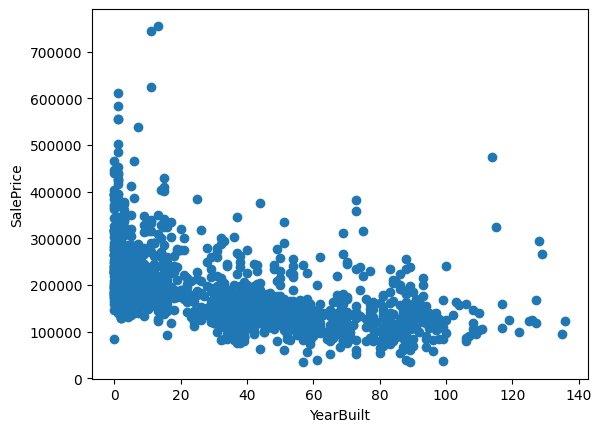

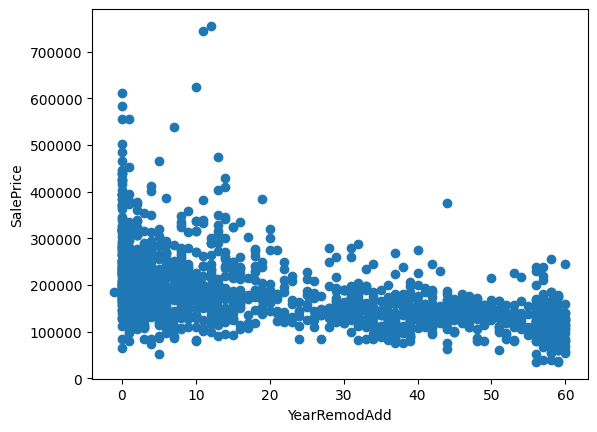

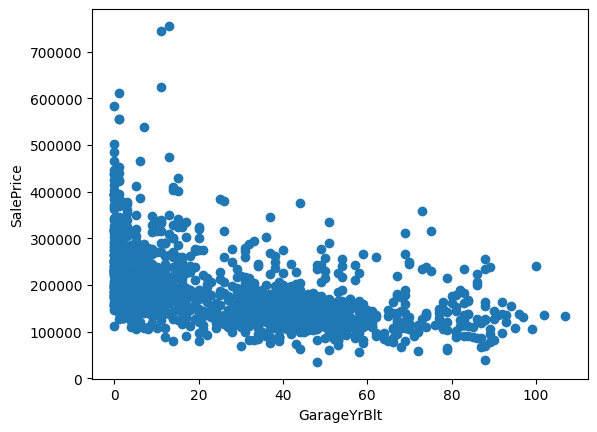

In [ ]:
for feature in year_feature:
  if feature != 'YrSold':
    df = df_train.copy()
    df[feature] = df['YrSold'] - df[feature]
    plt.scatter(df[feature], df['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [ ]:
discrete_feature = [feature for feature in numerical_feature if len(df_train[feature].unique()) < 25 and feature not in year_feature+['Id']]
len(discrete_feature)

17

In [ ]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

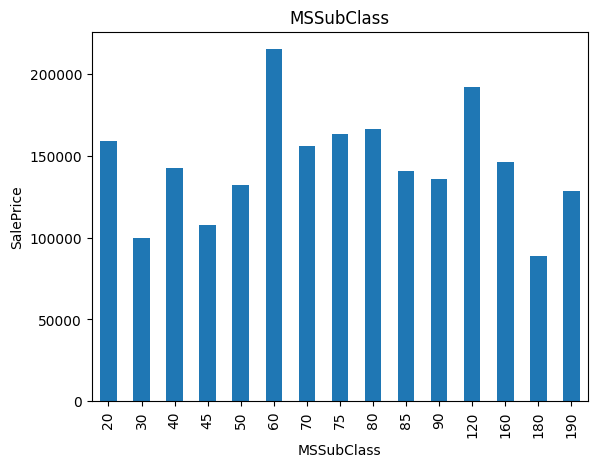

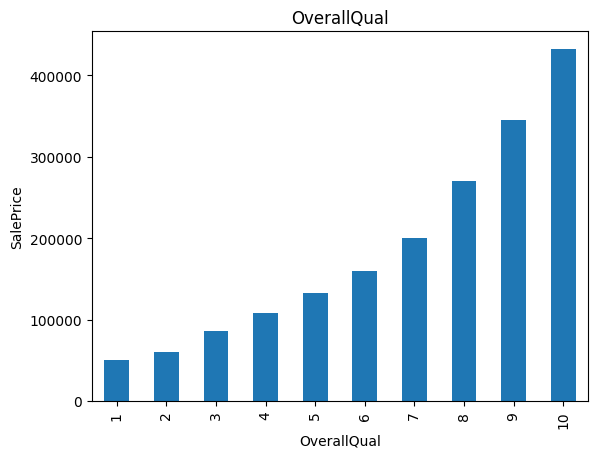

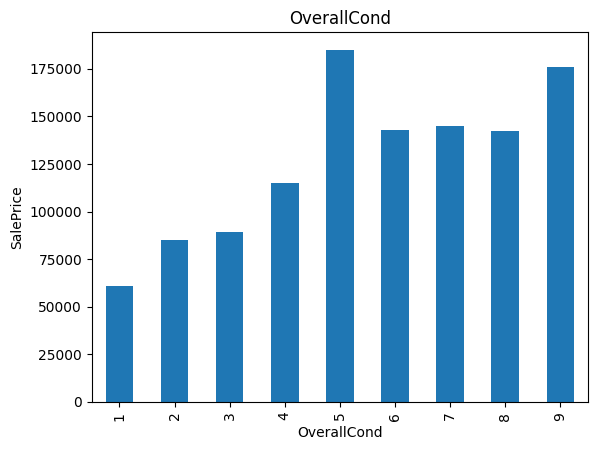

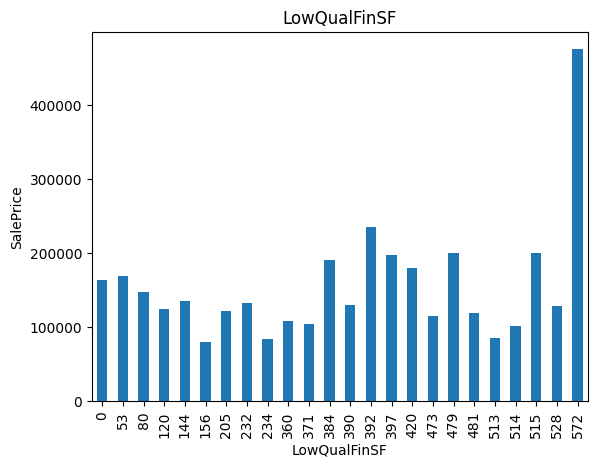

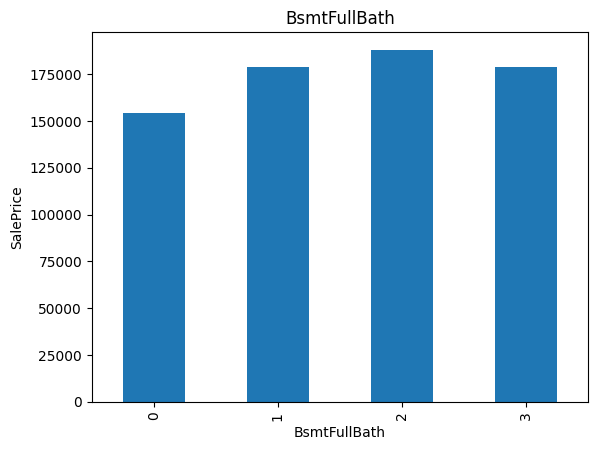

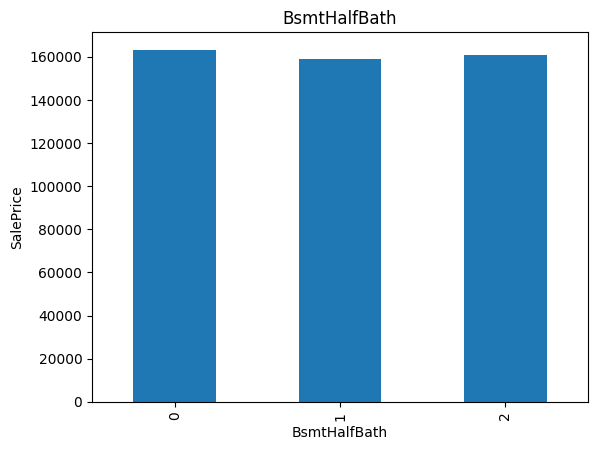

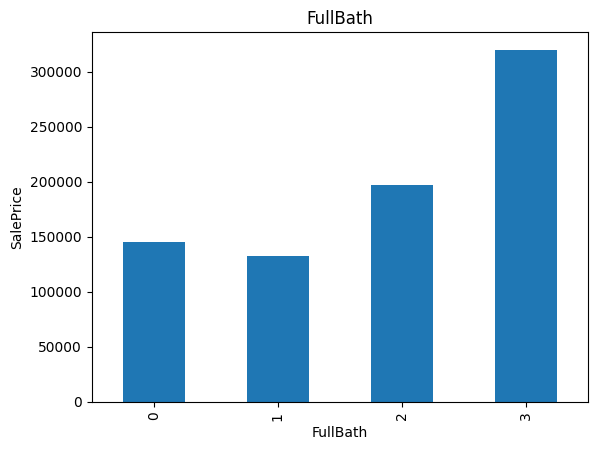

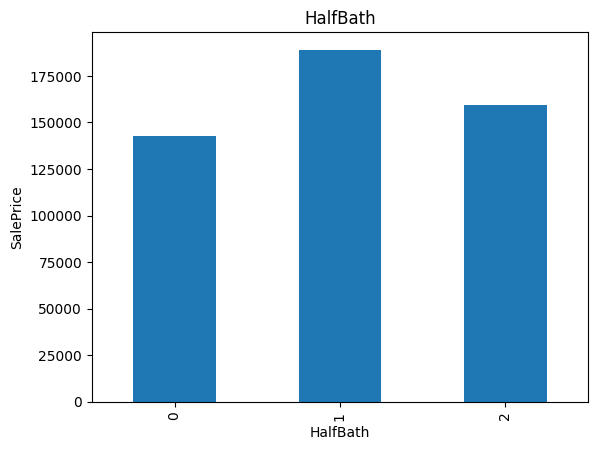

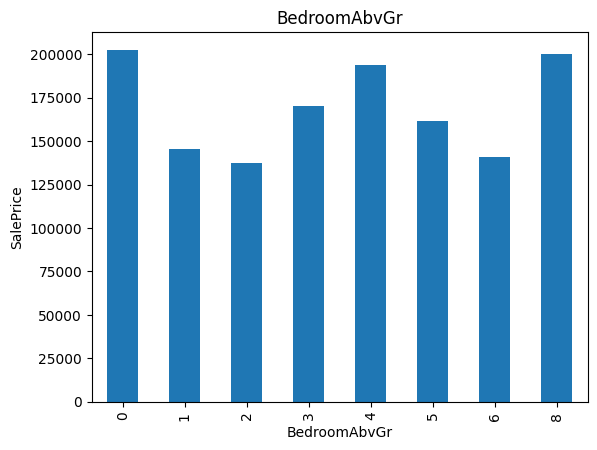

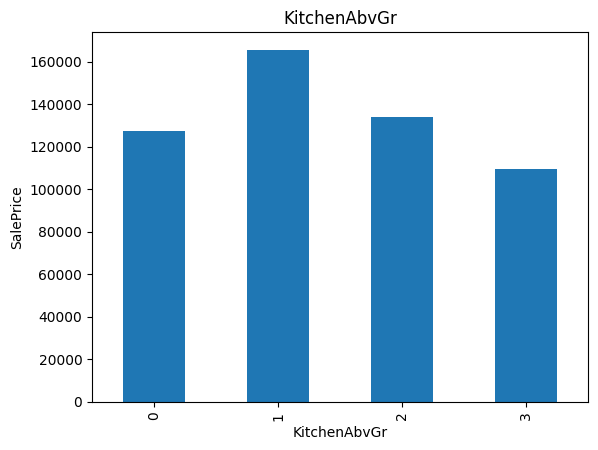

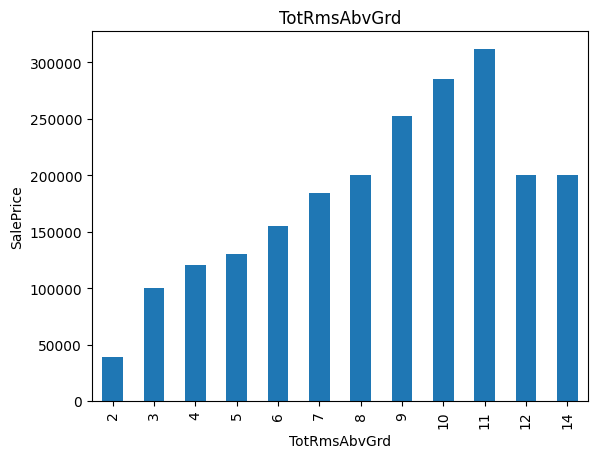

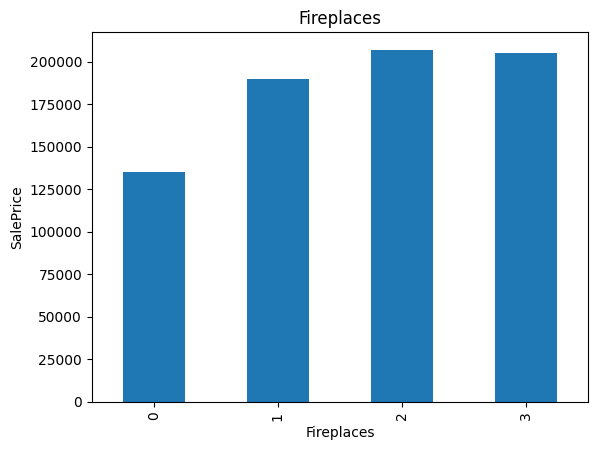

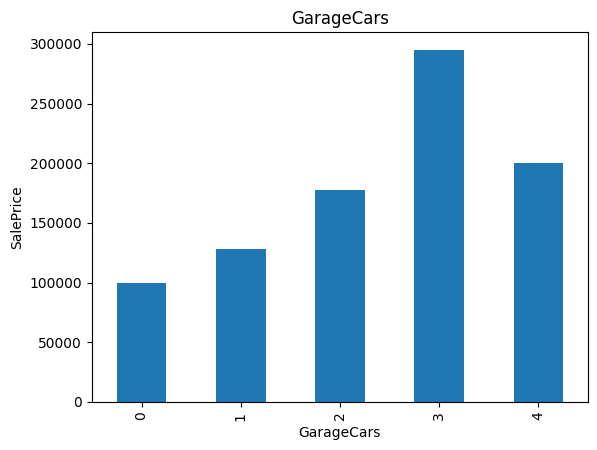

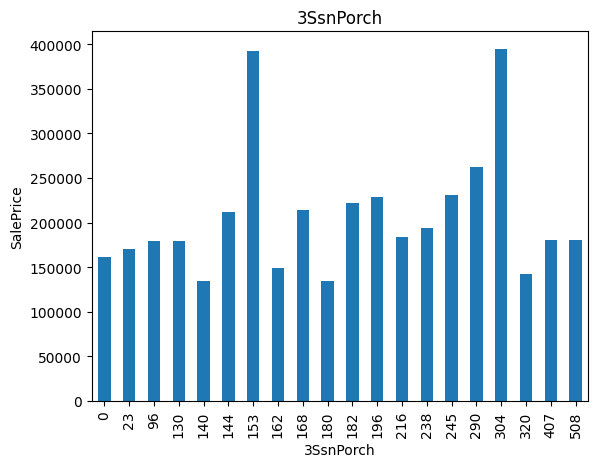

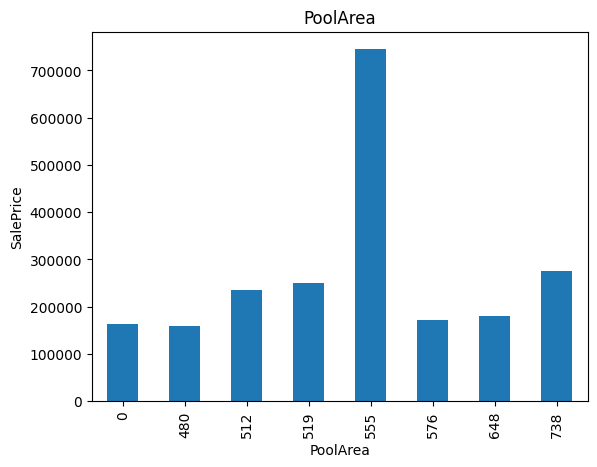

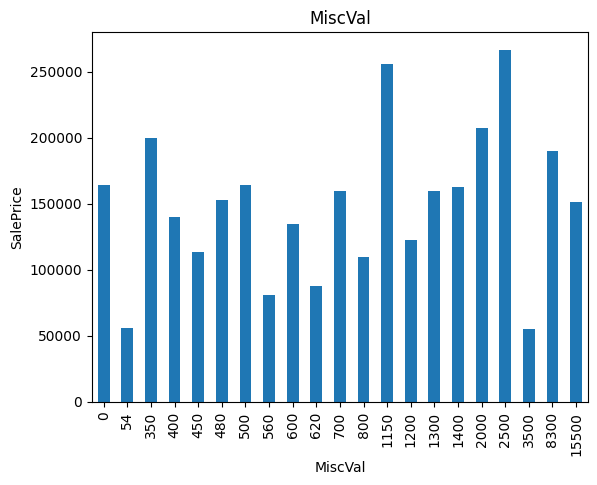

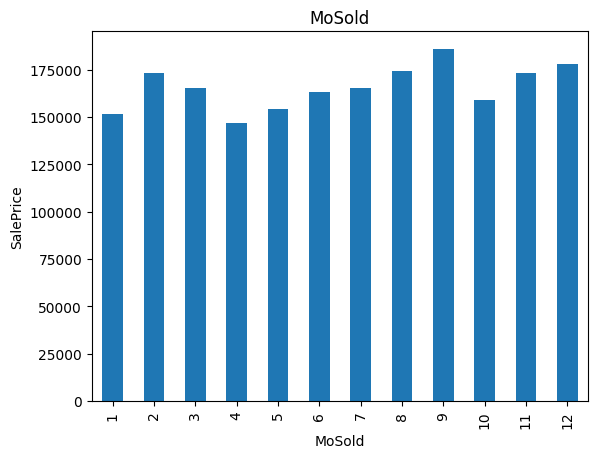

In [ ]:
for feature in discrete_feature:
  data = df_train.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

In [ ]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+year_feature+['Id']]
len(continuous_feature)

16

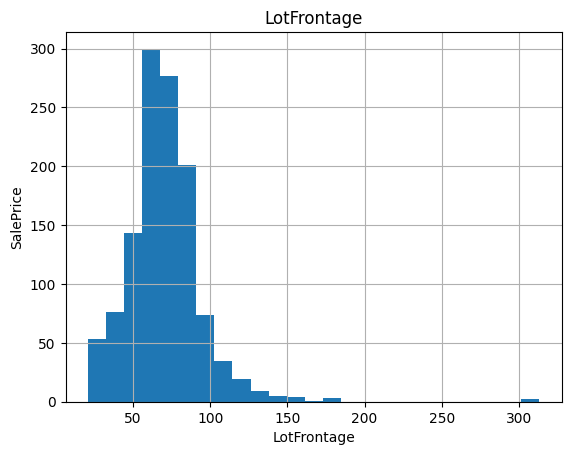

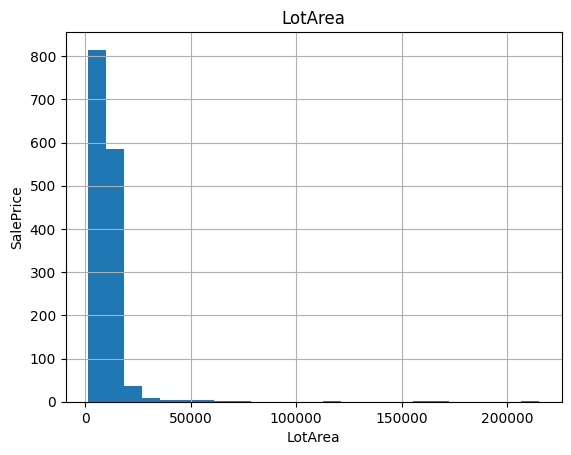

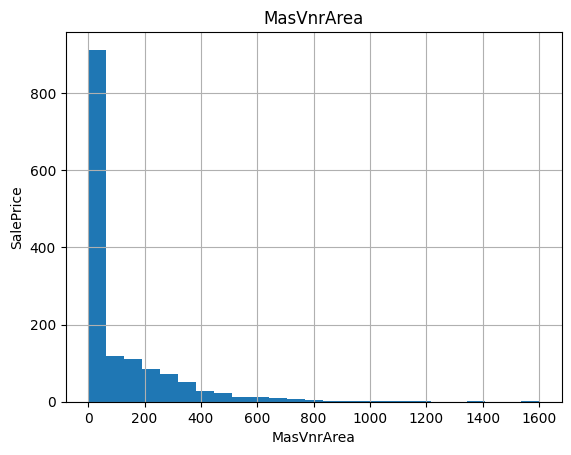

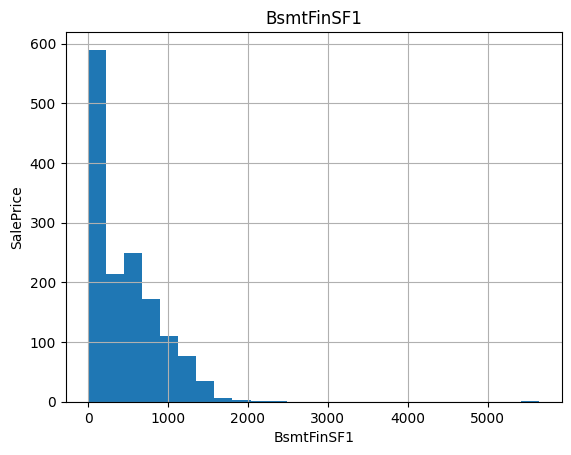

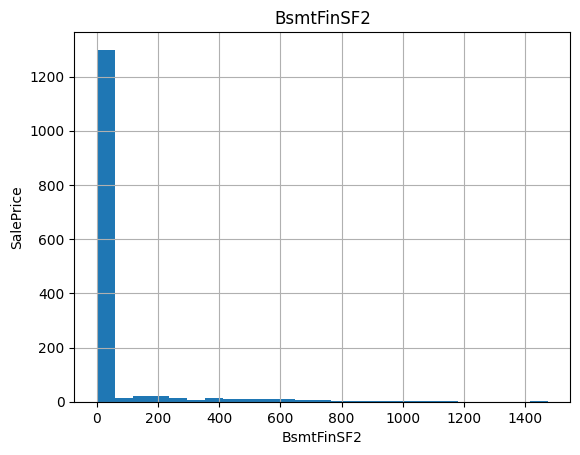

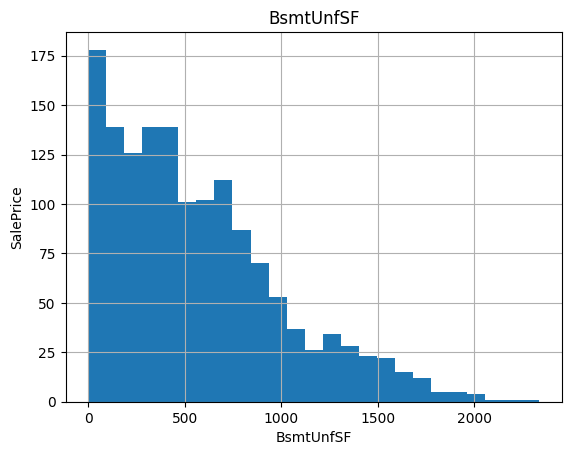

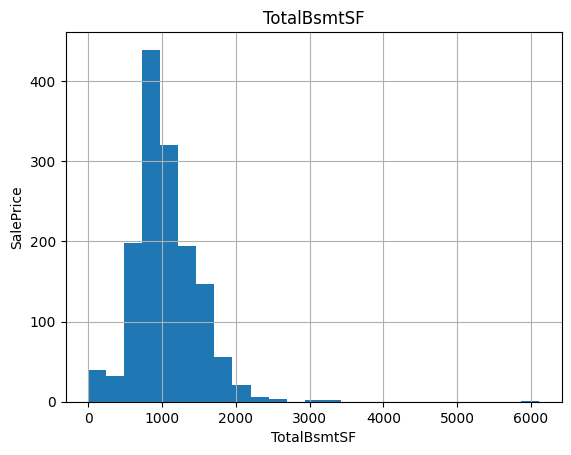

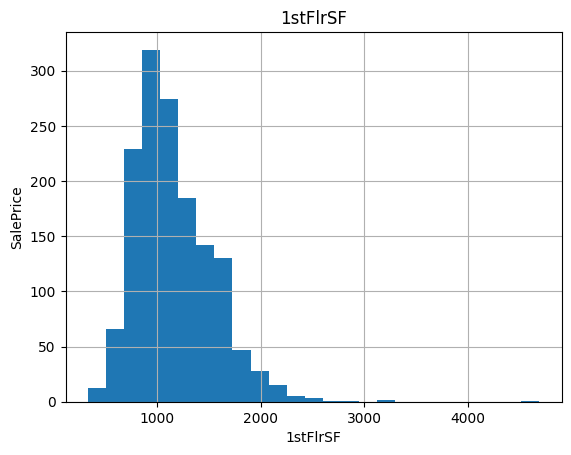

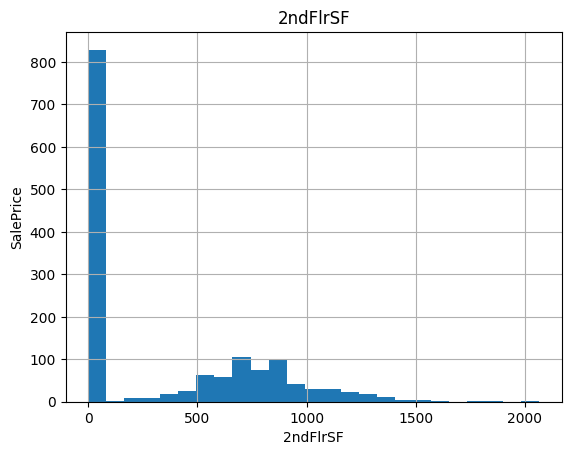

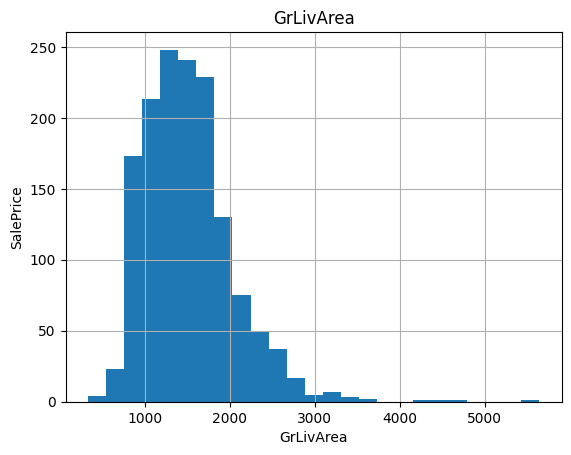

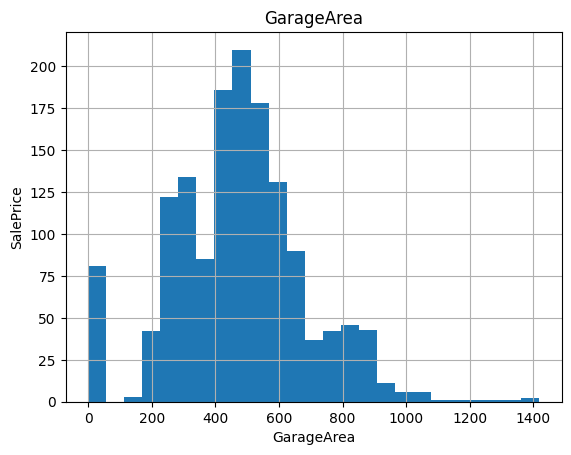

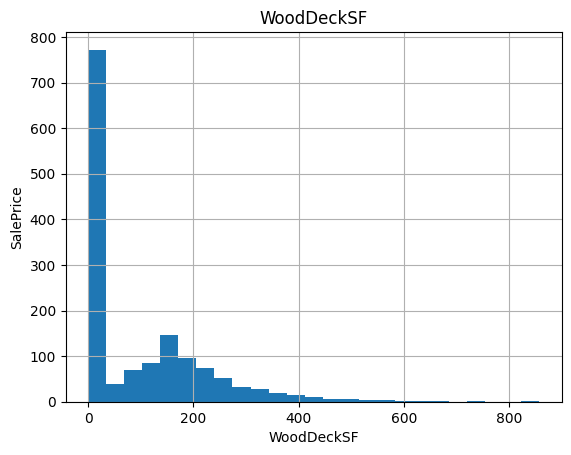

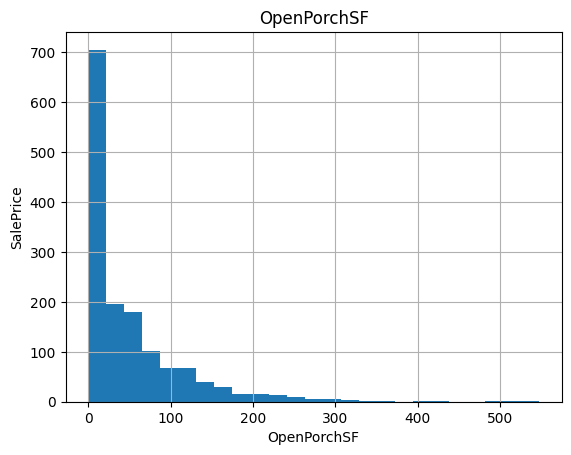

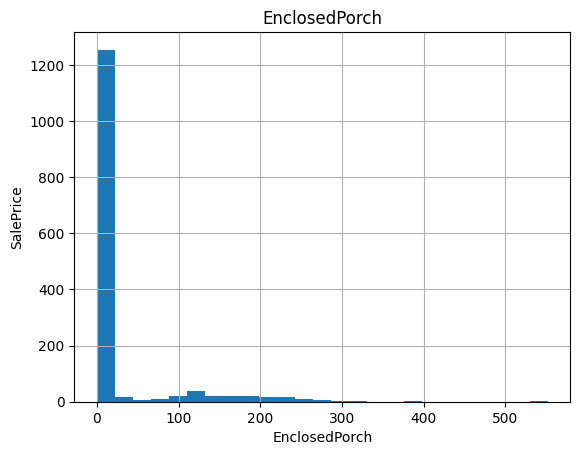

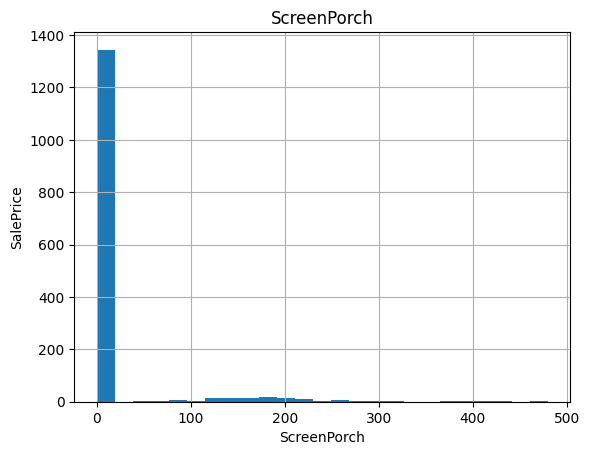

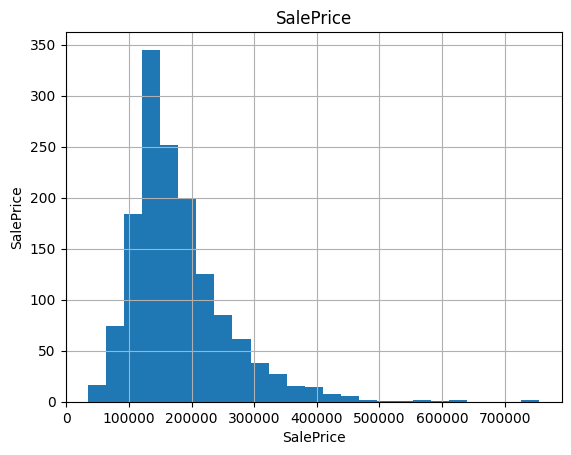

In [ ]:
for feature in continuous_feature:
  data = df_train.copy()
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()


##Log Transformation

Log transformation is applied to:

    Reduce skewness in the data.
    Stabilize variance.
    Make the data more normally distributed, which can be beneficial for linear regression models and other statistical analyses.

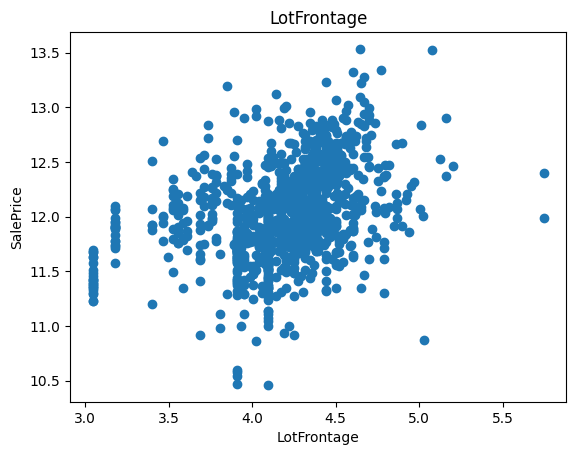

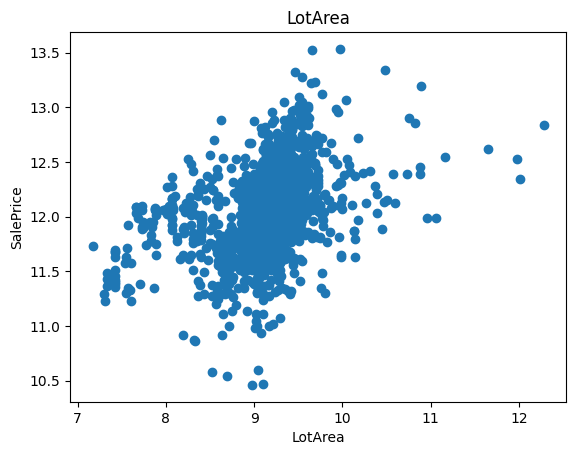

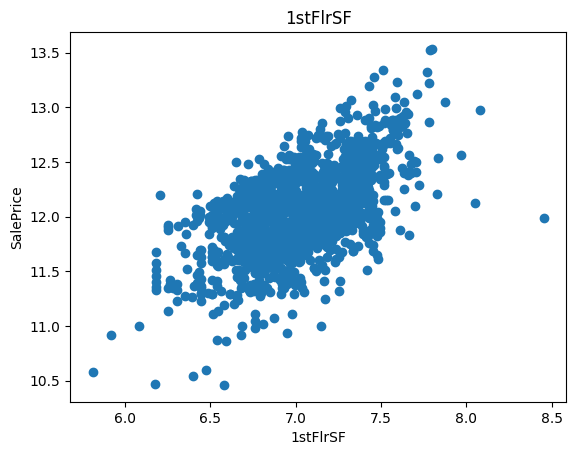

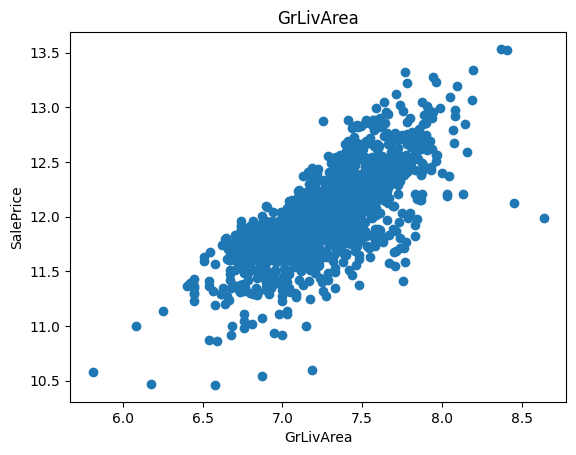

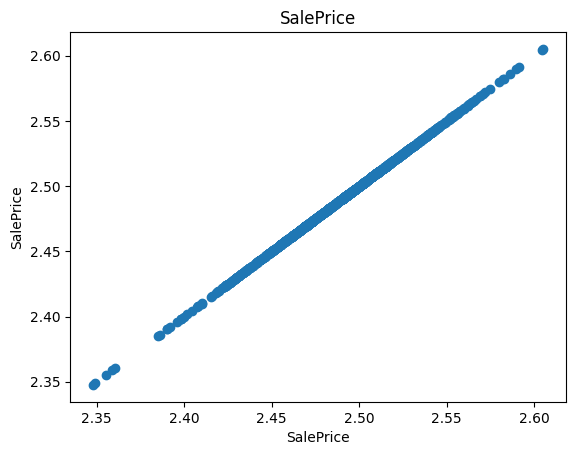

In [ ]:
for feature in continuous_feature:
  data = df_train.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data['SalePrice'] = np.log(data['SalePrice'])
    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

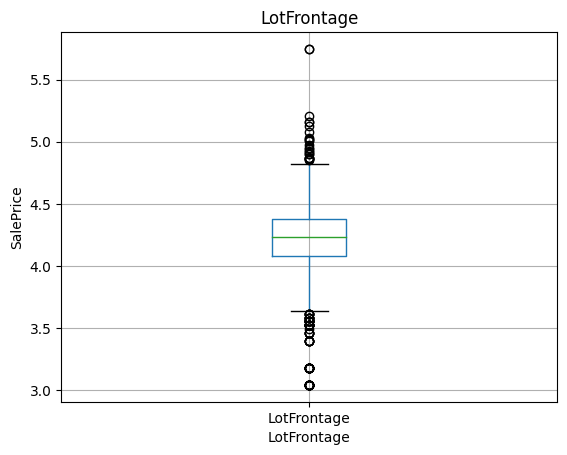

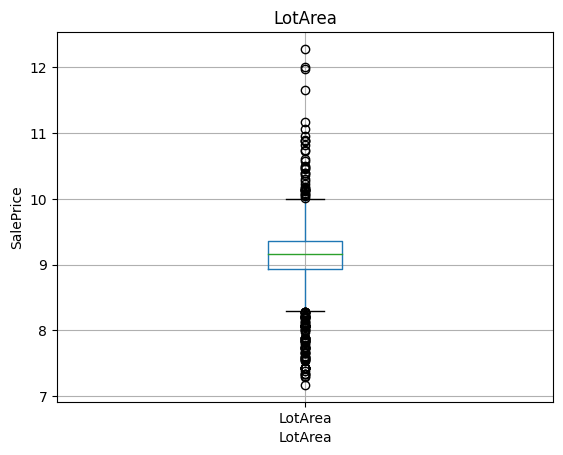

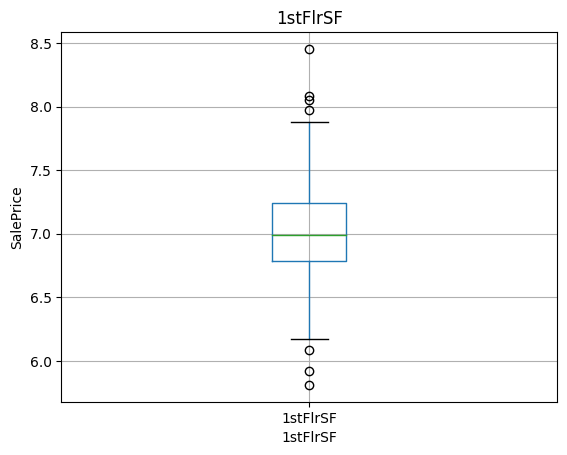

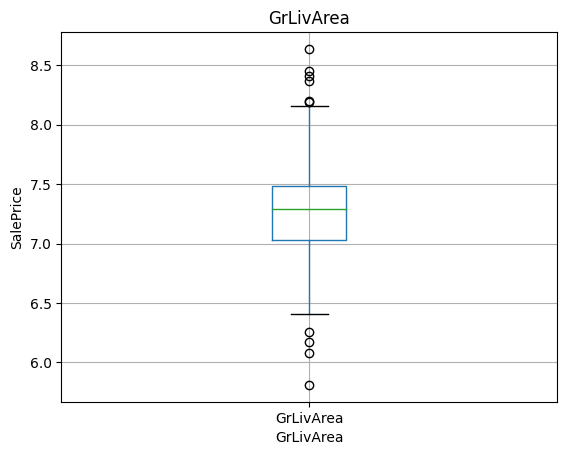

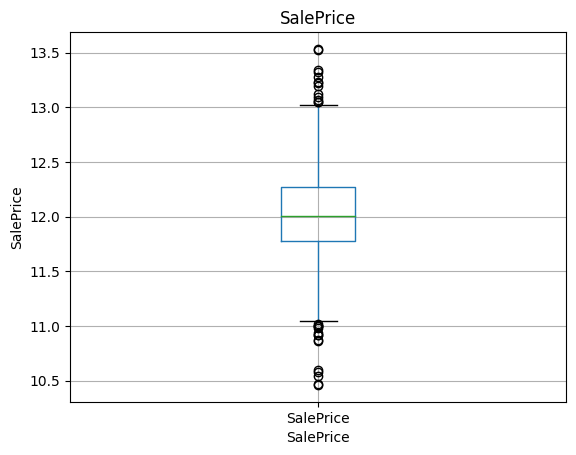

In [ ]:
for feature in continuous_feature:
  data = df_train.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column = feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [ ]:
categorical_feature = [feature for feature in df_train.columns if df_train[feature].dtypes == 'O']
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
df_train[categorical_feature]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,NaN,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


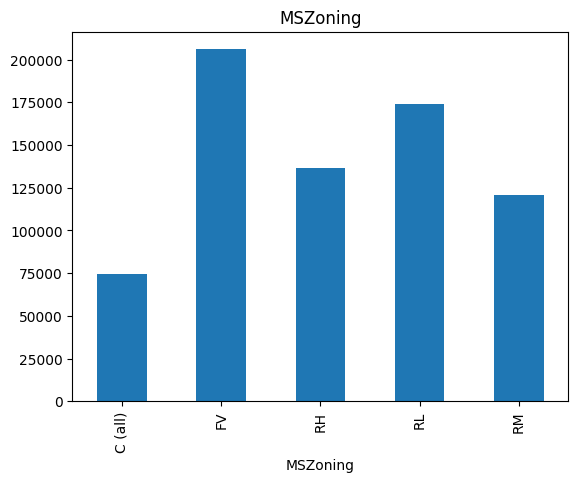

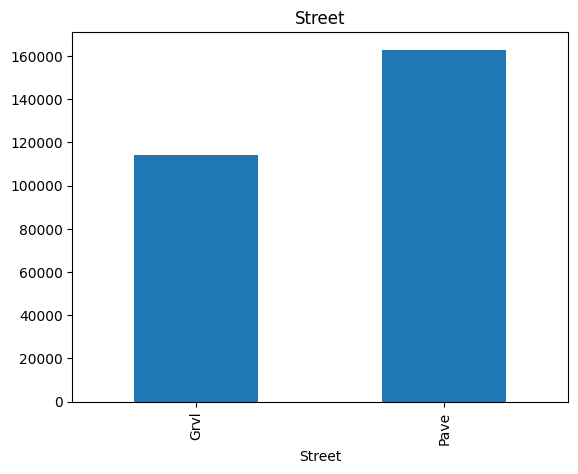

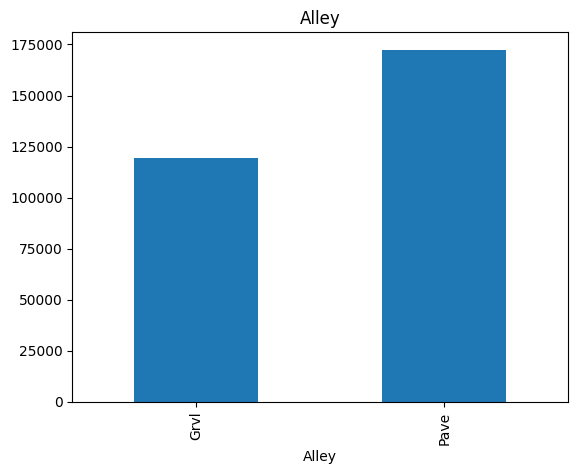

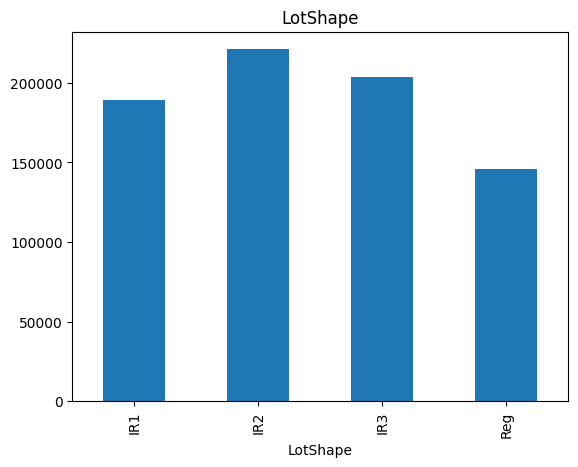

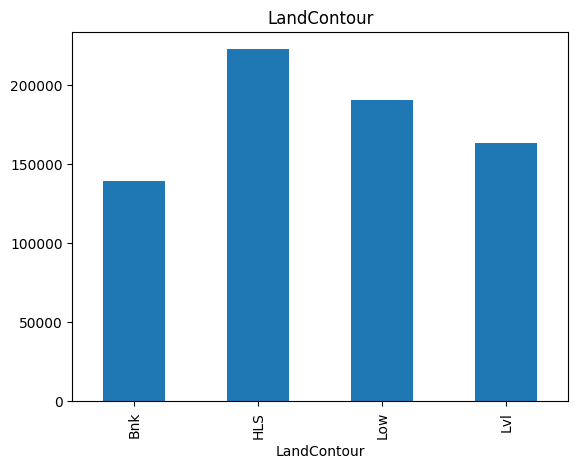

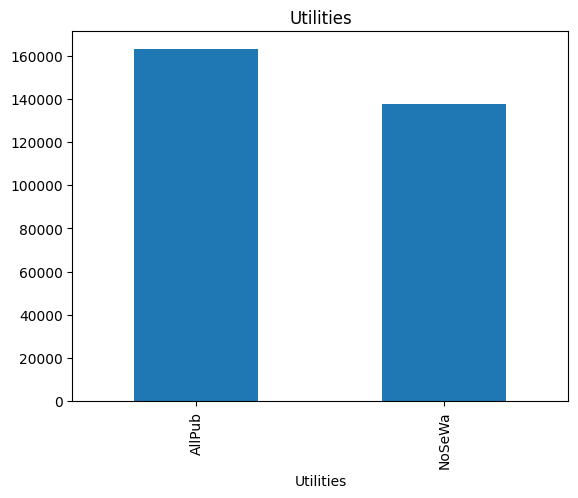

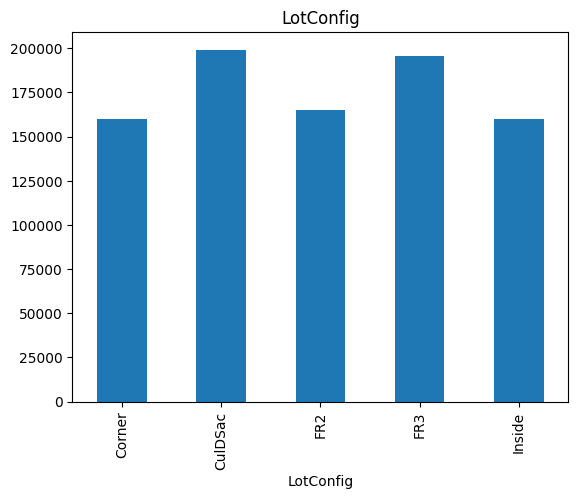

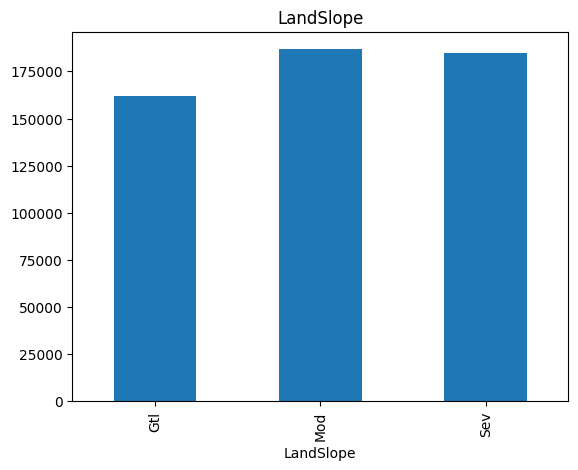

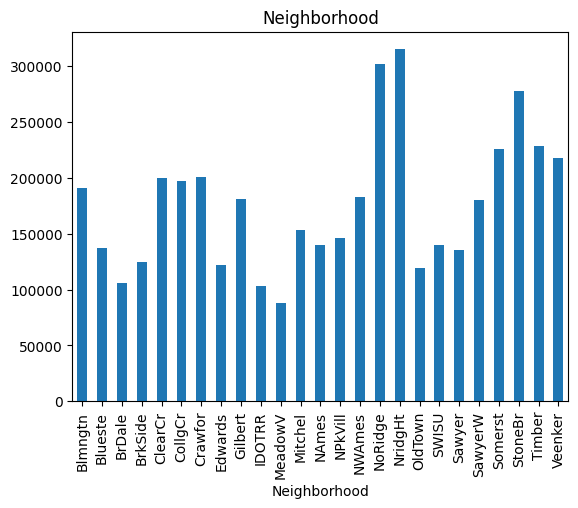

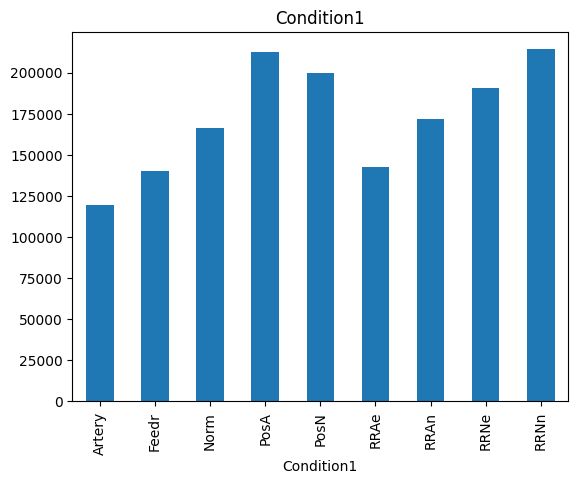

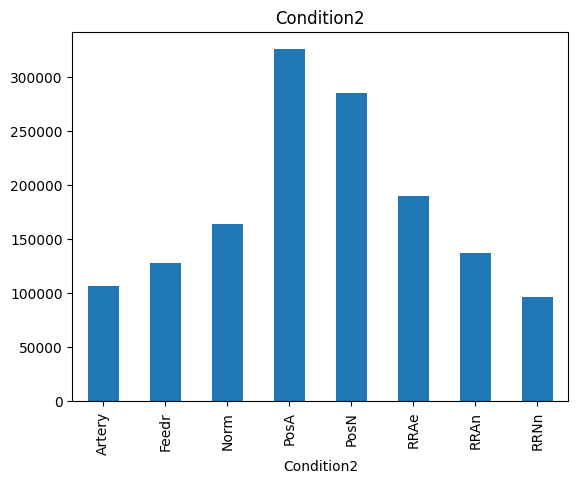

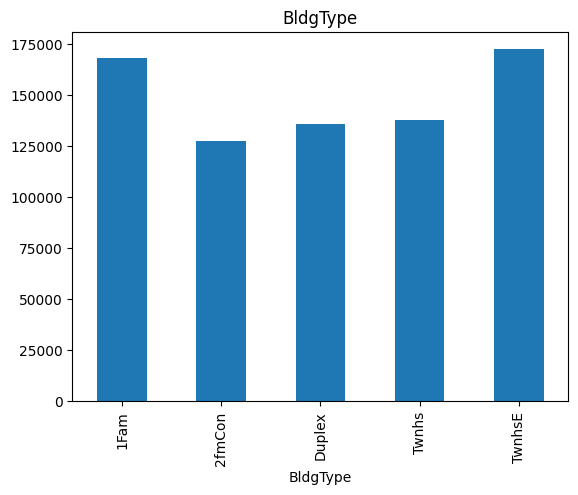

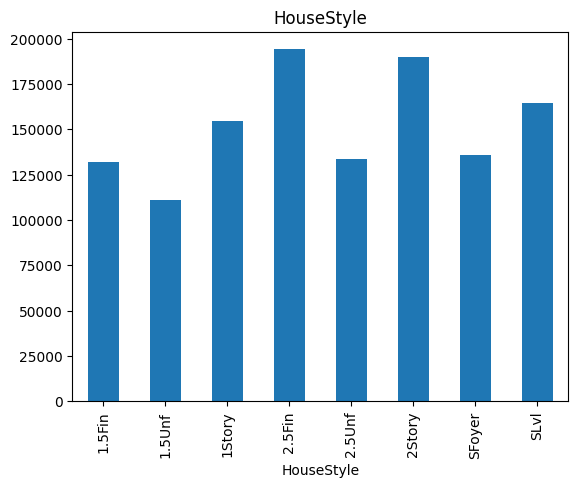

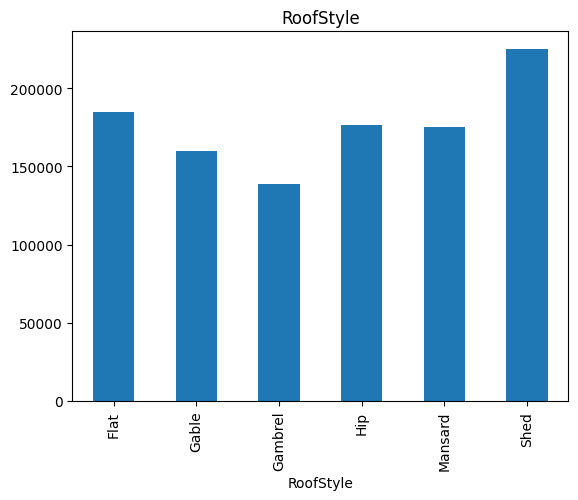

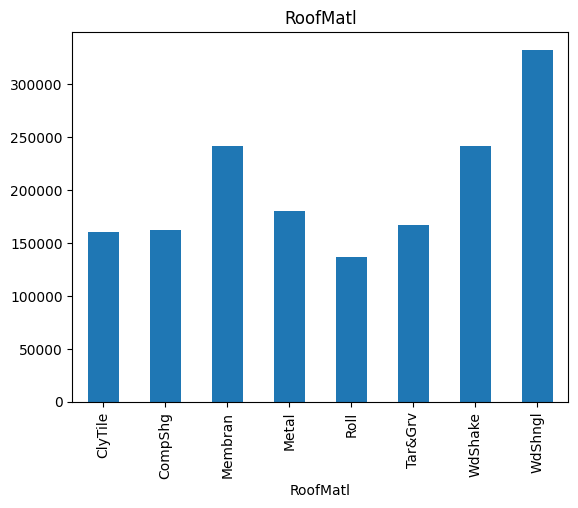

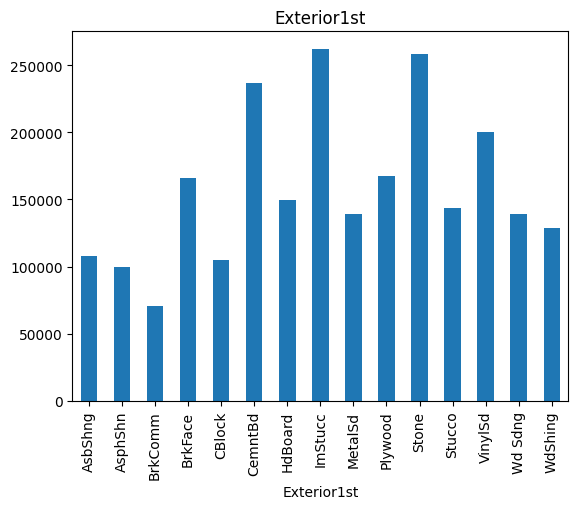

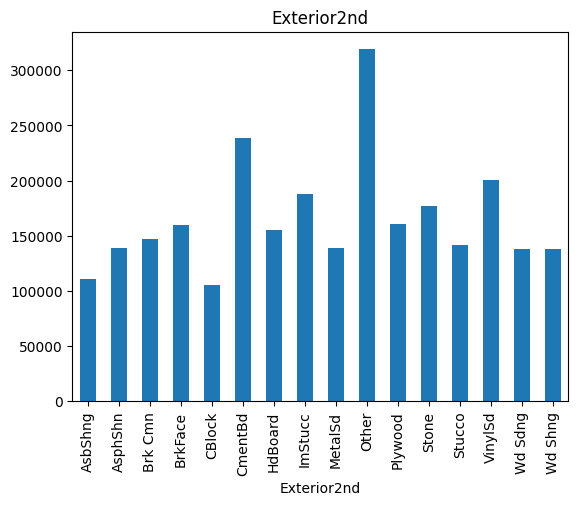

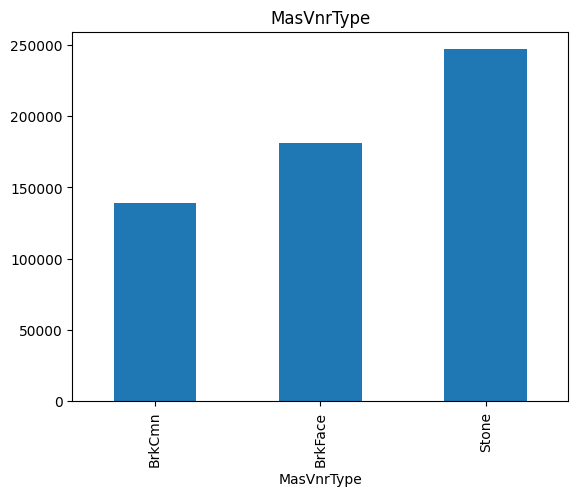

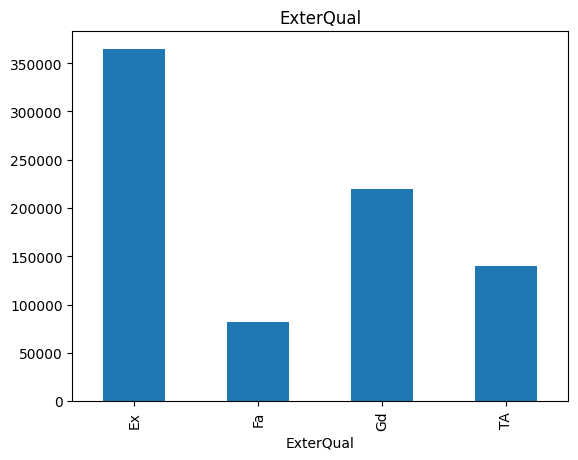

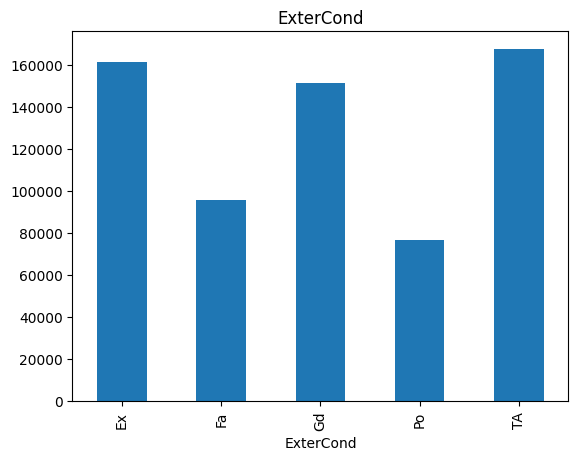

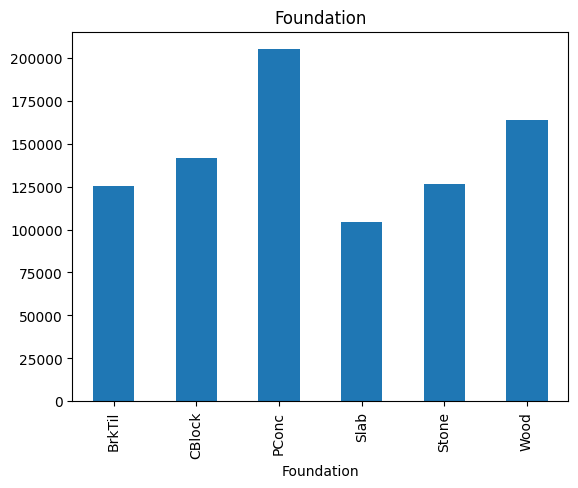

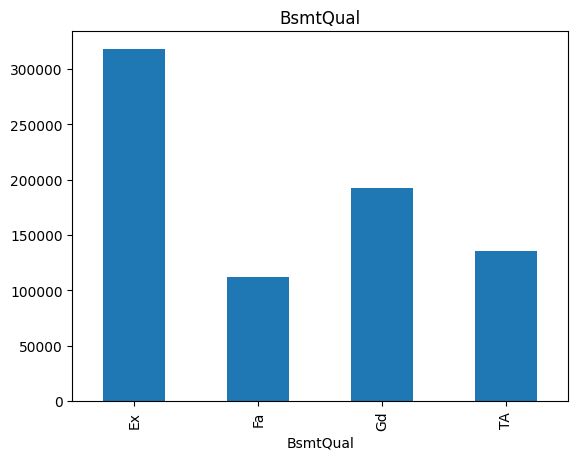

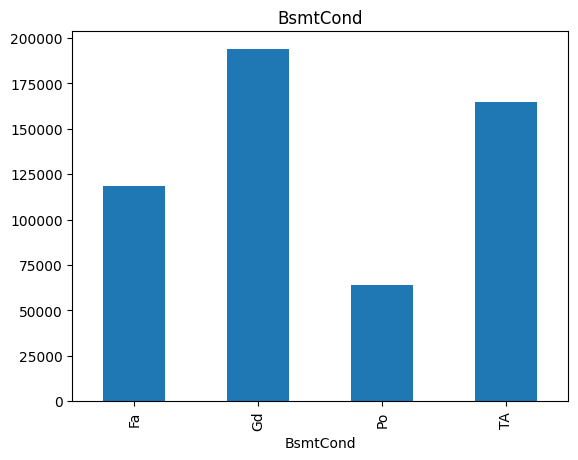

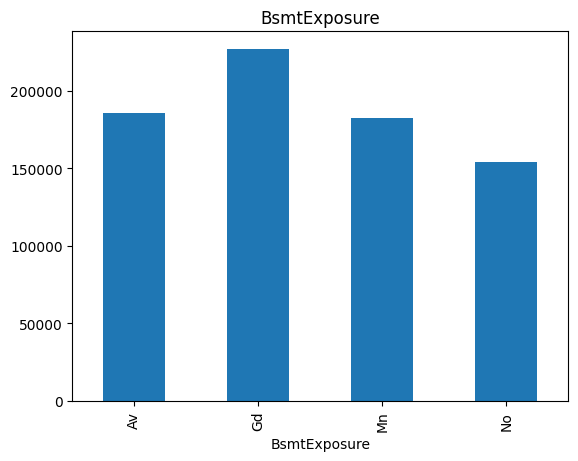

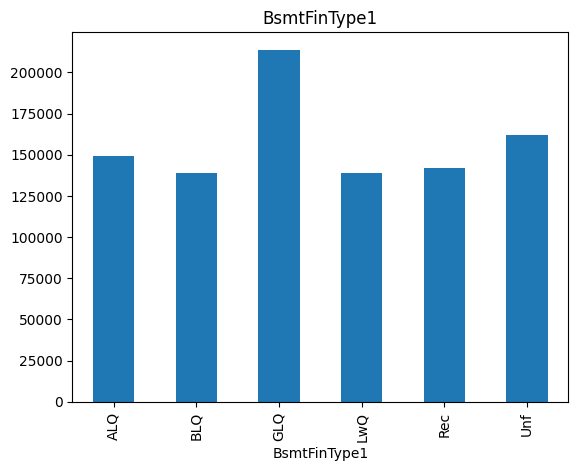

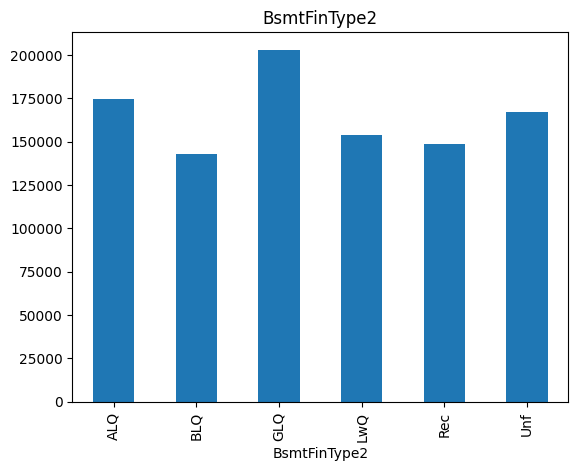

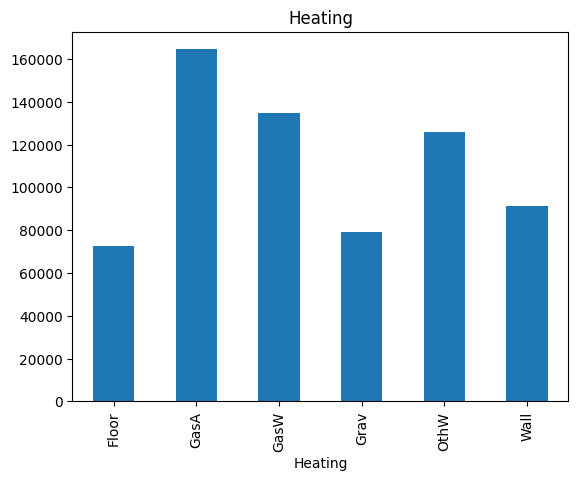

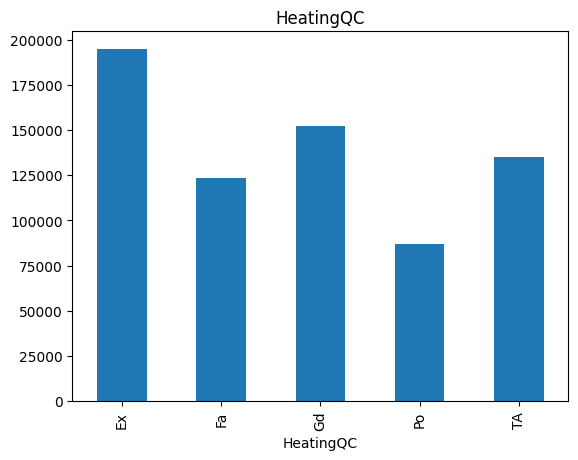

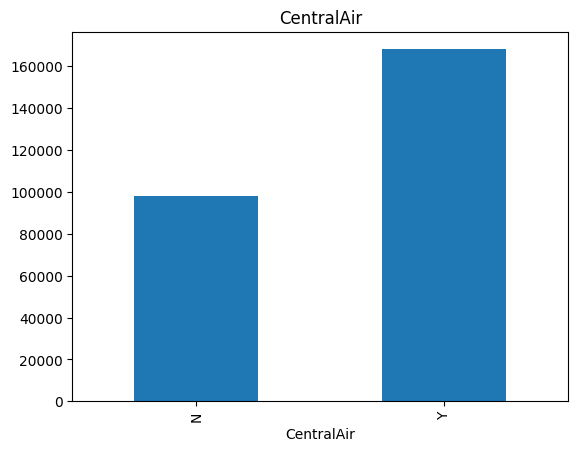

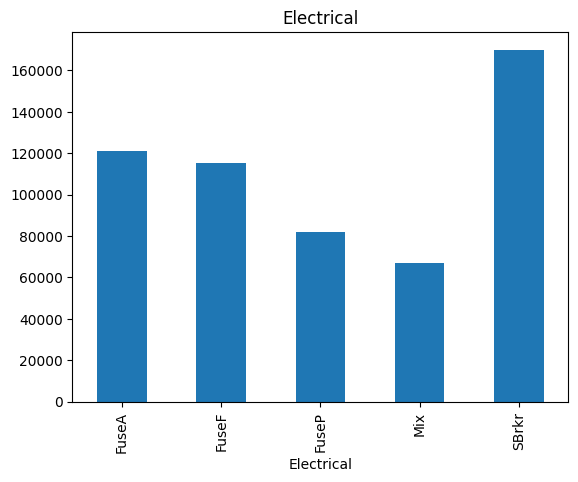

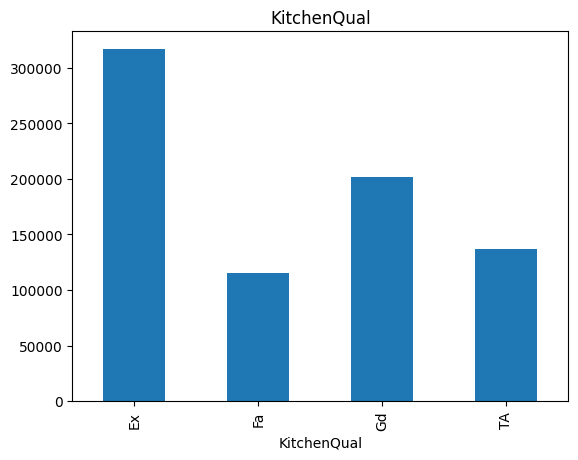

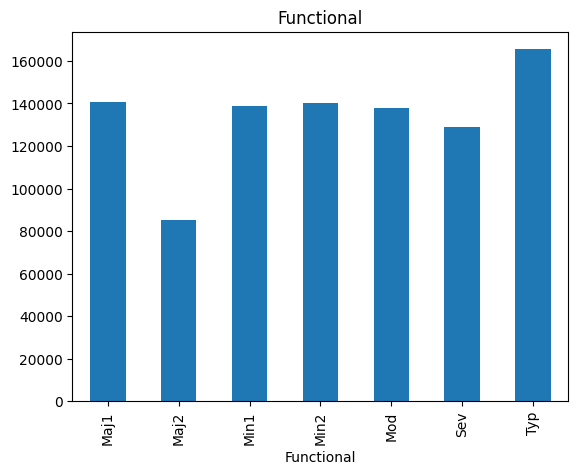

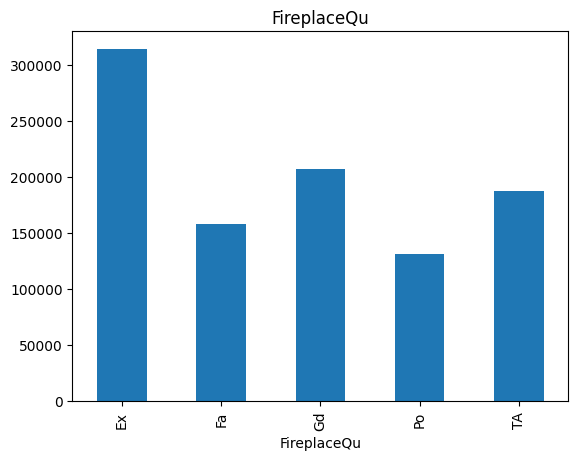

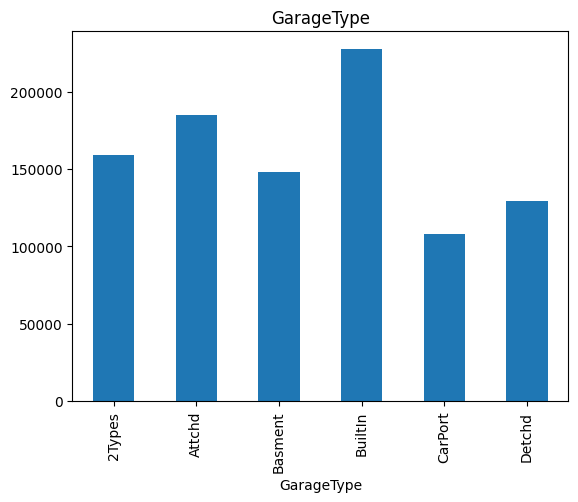

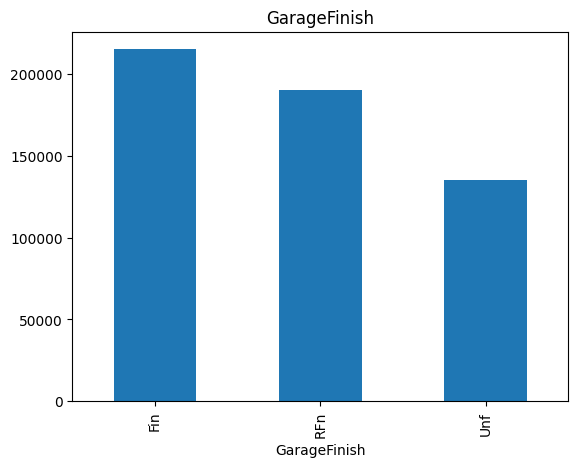

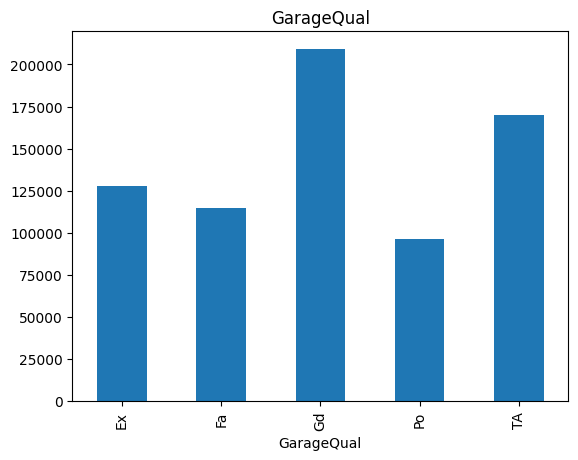

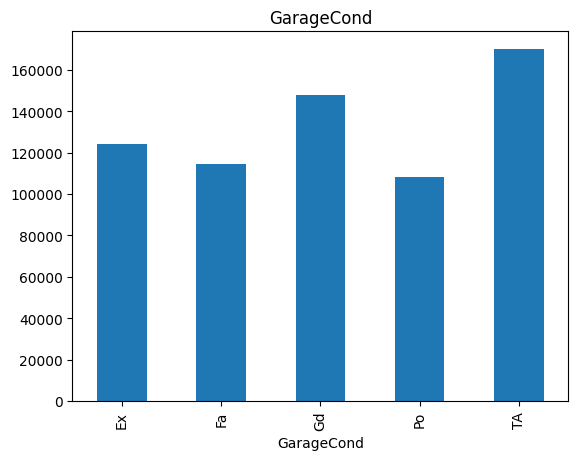

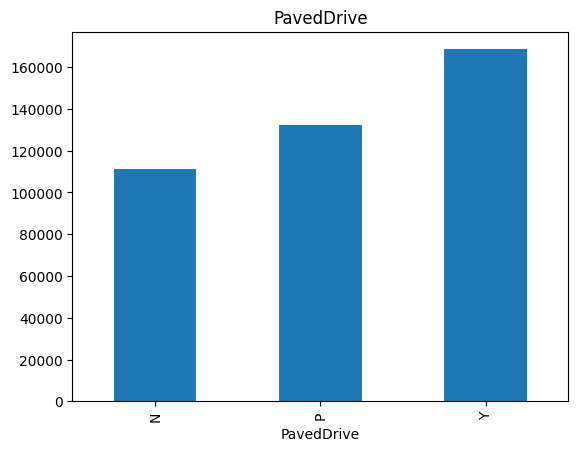

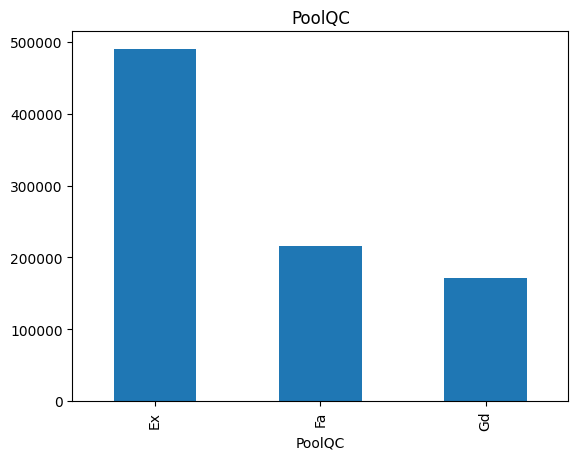

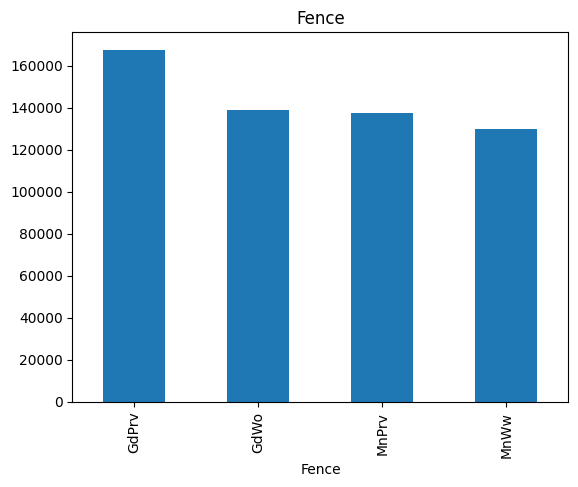

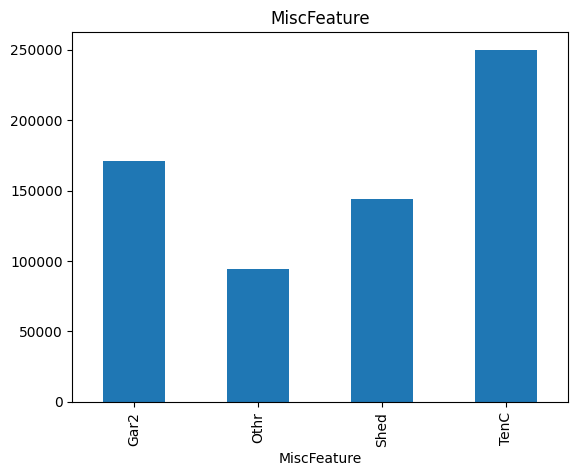

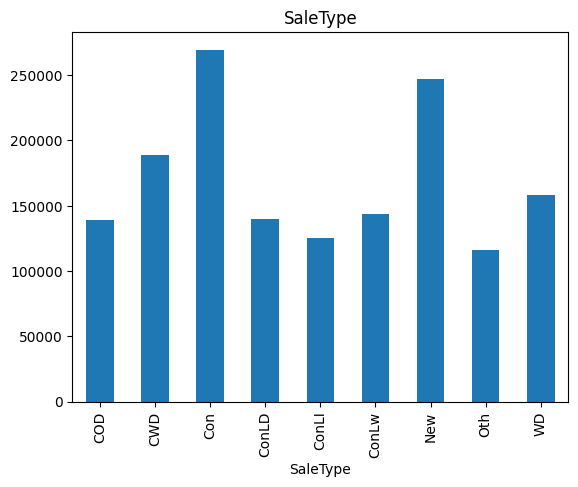

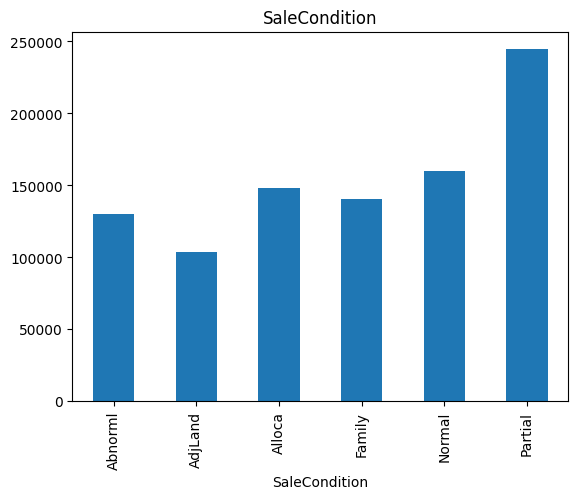

In [ ]:
for feature in categorical_feature:
  data = df_train.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df_train, df_train['SalePrice'],test_size = 0.1, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((1314, 81), (146, 81))

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#make the list of categorical features which has missing values
feature_with_nan = [features for features in df_train.columns if df_train[features].isnull().sum()>1 and df_train[features].dtypes == 'O']
# list out the feature with the % of missing values
for feature in feature_with_nan:
  print(feature, np.round(df_train[feature].isnull().mean(),4), '% missing values')

Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


In [ ]:
# replace missing value with a label
def replace_cat_feature(df, feature_nan):
  data = df.copy()
  data[feature_nan] = data[feature_nan].fillna('Missing')
  return data

In [ ]:
df_train = replace_cat_feature(df_train, feature_with_nan)
df_train[feature_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [ ]:
#make the list of numerical features which has missing values
numerical_with_nan = [features for features in df_train.columns if df_train[features].isnull().sum()>1 and df_train[features].dtypes != 'O']
# list out the feature with the % of missing values
for feature in numerical_with_nan:
  print(feature, np.round(df_train[feature].isnull().mean(),4), '% missing values')

LotFrontage 0.1774 % missing values
MasVnrArea 0.0055 % missing values
GarageYrBlt 0.0555 % missing values


In [ ]:
for feature in numerical_with_nan:
  median_val = df_train[feature].median()
  df_train[feature+'nan'] = np.where(df_train[feature].isnull(), 1, 0)
  df_train[feature].fillna(median_val, inplace = True)

df_train[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
df_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0

In [ ]:
for feature in year_feature:
  if feature != 'YrSold':
    df_train[feature] = df_train['YrSold'] - df_train[feature]
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


(array([506., 840.,  77.,  14.,   8.,   2.,   3.,   4.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1300. ,   8431.5,  15563. ,  22694.5,  29826. ,  36957.5,
         44089. ,  51220.5,  58352. ,  65483.5,  72615. ,  79746.5,
         86878. ,  94009.5, 101141. , 108272.5, 115404. , 122535.5,
        129667. , 136798.5, 143930. , 151061.5, 158193. , 165324.5,
        172456. , 179587.5, 186719. , 193850.5, 200982. , 208113.5,
        215245. ]),
 <BarContainer object of 30 artists>)

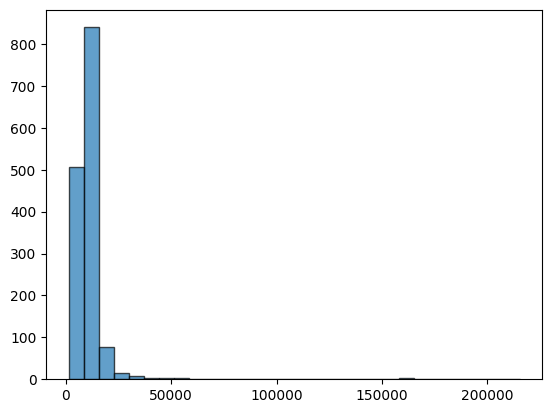

In [ ]:
plt.hist(df_train['LotArea'].dropna(), bins=30, edgecolor='k', alpha=0.7)

In [ ]:
import numpy as np
num_feature = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_feature:
  df_train[feature] = np.log(df_train[feature])
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


(array([ 23.,  19.,   0.,   6.,   5.,  26.,   7.,  34.,  18.,  82.,  52.,
        183., 116., 421., 190.,  91.,  76.,  46.,  26.,  15.,  10.,   6.,
          2.,   4.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([3.04452244, 3.13457846, 3.22463449, 3.31469051, 3.40474654,
        3.49480256, 3.58485859, 3.67491461, 3.76497064, 3.85502666,
        3.94508269, 4.03513871, 4.12519474, 4.21525076, 4.30530679,
        4.39536281, 4.48541884, 4.57547486, 4.66553089, 4.75558691,
        4.84564294, 4.93569896, 5.02575499, 5.11581101, 5.20586704,
        5.29592307, 5.38597909, 5.47603512, 5.56609114, 5.65614717,
        5.74620319]),
 <BarContainer object of 30 artists>)

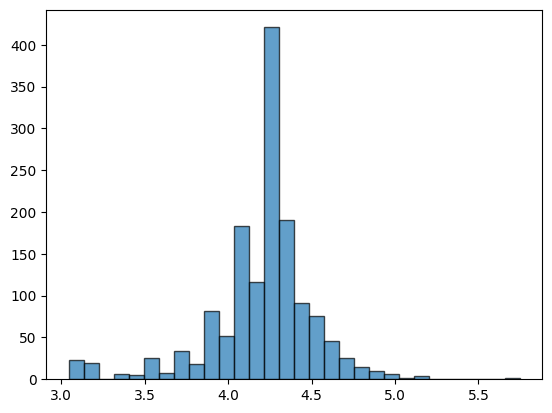

In [ ]:
plt.hist(df_train['LotFrontage'].dropna(), bins=30, edgecolor='k', alpha=0.7)

In [ ]:
categorical_feature = [feature for feature in df_train.columns if df_train[feature].dtypes == 'O']
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
for feature in categorical_feature:
  temp = df_train.groupby(feature)['SalePrice'].count()/len(df_train)
  temp_df = temp[temp>0.01].index
  df_train[feature] = np.where(df_train[feature].isin(temp_df), df_train[feature],'Rare_var')

In [ ]:
df_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,G

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorical_feature:
  df_train[feature] = le.fit_transform(df_train[feature])
df_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,2,4.174387,9.041922,0,1,3,3,0,3,0,4,2,0,0,2,7,5,5,5,0,0,8,8,1,196.0,1,3,2,2,4,4,2,706,6,0,150,856,0,0,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548,3,3,2,0,61,0,0,0,0,0,2,0,0,2,2008,3,2,12.247694,0,0,0
1,2,20,2,4.382027,9.169518,0,1,3,3,0,2,0,16,1,0,0,1,6,8,31,31,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978,6,0,284,1262,0,0,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460,3,3,2,298,0,0,0,0,0,0,2,0,0,5,2007,3,2,12.109011,0,0,0
2,3,60,2,4.219508,9.328123,0,1,0,3,0,3,0,4,2,0,0,2,7,5,7,6,0,0,8,8,1,162.0,1,3,2,2,4,3,2,486,6,0,434,920,0,0,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608,3,3,2,0,42,0,0,0,0,0,2,0,0,9,2008,3,2,12.317167,0,0,0
3,4,70,2,4.094345,9.164296,0,1,0,3,0,0,0,5,2,0,0,2,7,5,91,36,0,0,9,10,2,0.0,3,3,0,4,1,4,0,216,6,0,540,756,0,2,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642,3,3,2,0,35,272,0,0,0,0,2,0,0,2,2006,3,0,11.849398,0,0,0
4,5,60,2,4.430817,9.565214,0,1,0,3,0,2,0,13,2,0,0,2,8,5,8,8,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655,6,0,490,1145,0,0,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836,3,3,2,192,84,0,0,0,0,0,2,0,0,12,2008,3,2,12.429216,0,0,0
5,6,50,2,4.442651,9.554993,0,1,0,3,0,3,0,10,2,0,0,0,5,5,16,14,0,0,8,8,2,0.0,3,3,3,2,4,4,2,732,6,0,64,796,0,0,1,3,6.679599,566,0,7.216709,1,0,1,1,1,1,3,5,4,0,3,0,16.0,3,2,480,3,3,2,40,30,0,320,0,0,0,3,2,700,10,2009,3,2,11.870600,0,0,0
6,7,20,2,4.317488,9.218705,0,1,3,3,0,3,0,20,2,0,0,1,8,5,3,2,0,0,8,8,3,186.0,1,3,2,0,4,0,2,1369,6,0,317,1686,0,0,1,3,7.434848,0,0,7.434848,1,0,2,0,3,1,2,7,4,1,2,0,3.0,2,2,636,3,3,2,255,57,0,0,0,0,0,2,0,0,8,2007,3,2,12.634603,0,0,0
7,8,60,2,4.234107,9.247829,0,1,0,3,0,0,0,12,3,0,0,2,7,6,36,36,0,0,3,3,3,240.0,3,3,1,2,4,3,0,859,1,32,216,1107,0,0,1,3,7.009409,983,0,7.644919,1,0,2,1,3,1,3,7,4,2,5,0,36.0,2,2,484,3,3,2,235,204,228,0,0,0,0,2,2,350,11,2009,3,2,12.206073,1,0,0
8,9,50,3,3.931826,8.719317,0,1,3,3,0,3,0,15,0,0,0,0,7,5,77,58,0,0,1,10,2,0.0,3,3,0,4,4,4,6,0,6,0,952,952,0,2,1,1,6.929517,752,0,7.480992,0,0,2,0,2,2,3,8,0,2,5,3,77.0,3,2,468,0,3,2,90,0,205,0,0,0,0,2,0,0,4,2008,3,0,11.774520,0,0,0
9,10,190,2,3.912023,8.911934,0,1,3,3,0,0,0,2,0,1,1,3,5,6,69,58,0,0,4,4,2,0.0,3,3,0,4,4,4,2,851,6,0,140,991,0,0,1,3,6.981935,0,0,6.981935,1,0,1,0,2,2,3,5,4,2,5,0,69.0,2,1,205,2,3,2,0,4,0,0,0,0,0,2,0,0,1,2008,3,2,11.678440,0,0,0


## Feature Scaling

In [ ]:
feature_scale = [feature for feature in df_train.columns if feature not in ['Id', 'SalePrice']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train[feature_scale])

MinMaxScaler()

In [ ]:
scaler.transform(df_train[feature_scale])

array([[0.23529412, 0.5       , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.5       , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.5       , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
data = pd.concat([df_train[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_train[feature_scale]), columns=feature_scale)],
                    axis=1)
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.8,0.8,0.333333,0.12250,0.333333,1.0,0.50,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,0.0,0.0,0.0
1,2,12.109011,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.666667,0.00000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,0.0,0.0,0.0
2,3,12.317167,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.8,0.8,0.333333,0.10125,0.333333,1.0,0.50,0.5,1.00,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,0.0,0.0,0.0
3,4,11.849398,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.9,1.0,0.666667,0.00000,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.8,0.8,0.333333,0.21875,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,0.0,0.0,0.0


In [ ]:
data.to_csv('X_train.csv', index = False)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
y_train = data[['SalePrice']]
y_train

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


In [ ]:
X_train = data.drop(['Id','SalePrice'], axis = 1)
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.8,0.8,0.333333,0.122500,0.333333,1.000000,0.50,0.5,1.00,1.00,0.333333,0.125089,1.000000,0.000000,0.064212,0.140098,0.0,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.090909,0.50,1.0,0.5,0.0,0.0,0.0
1,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.666667,0.000000,1.000000,1.000000,0.25,0.5,1.00,0.25,0.000000,0.173281,1.000000,0.000000,0.121575,0.206547,0.0,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.363636,0.25,1.0,0.5,0.0,0.0,0.0
2,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.8,0.8,0.333333,0.101250,0.333333,1.000000,0.50,0.5,1.00,0.75,0.333333,0.086109,1.000000,0.000000,0.185788,0.150573,0.0,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.727273,0.50,1.0,0.5,0.0,0.0,0.0
3,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.9,1.0,0.666667,0.000000,1.000000,1.000000,0.00,1.0,0.25,1.00,0.000000,0.038271,1.000000,0.000000,0.231164,0.123732,0.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.090909,0.00,1.0,0.0,0.0,0.0,0.0
4,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.8,0.8,0.333333,0.218750,0.333333,1.000000,0.50,0.5,1.00,0.00,0.333333,0.116052,1.000000,0.000000,0.209760,0.187398,0.0,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,1.000000,0.50,1.0,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.5,0.400718,0.353592,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.318182,0.4,0.0,0.0,0.4,0.555556,0.500,0.058824,0.131148,0.0,0.0,0.8,0.8,0.666667,0.000000,1.000000,1.000000,0.50,0.5,1.00,1.00,1.000000,0.000000,1.000000,0.000000,0

In [ ]:
# Apply Feature Selection
# First we apply lasso regression bigger alpha means less features will be selected
# Then selectfrommodel which select the features with non zero coefficients value
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [52]:
print(f'Total Features: {X_train.shape[1]}')
selected_feature = X_train.columns[(feature_sel_model.get_support())]
print(f'Selected Features: {len(selected_feature)}')
print(f'features with the coefficients shrank to zero: {np.sum(feature_sel_model.estimator_.coef_ == 0)}')

Total Features: 82
Selected Features: 20
features with the coefficients shrank to zero: 62


In [53]:
selected_feature

Index(['MSZoning', 'LotShape', 'BldgType', 'OverallQual', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

In [54]:
X_train[selected_feature].head()

,MSZoning,LotShape,BldgType,OverallQual,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,0.5,1.0,0.0,0.666667,0.098361,0.333333,0.5,1.00,0.333333,0.0,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.0,0.666667,0.50,1.0
1,0.5,1.0,0.0,0.555556,0.524590,1.000000,0.5,0.25,0.000000,0.0,1.0,0.503056,0.470245,0.000000,1.000000,0.333333,0.0,0.666667,0.50,1.0
2,0.5,0.0,0.0,0.666667,0.114754,0.333333,0.5,0.75,0.333333,0.0,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.0,0.666667,0.50,1.0
3,0.5,0.0,0.0,0.666667,0.606557,1.000000,1.0,1.00,0.000000,0.5,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.6,1.000000,0.75,1.0
4,0.5,0.0,0.0,0.777778,0.147541,0.333333,0.5,0.00,0.333333,0.0,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.0,0.666667,0.75,1.0
